# Business Case :
# Analysis of the loan company's customer base and prediction of loan repayment probability based on the selected variables

__<h>Data Processing and Data Cleaning</h>__

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# the file contains the first 4 lines of the description and the last 2753 lines contain loans that do not meet the credit policy, so I decided to consider only the first 39789 lines of the csv data base
loan_fulldata = pd.read_csv("Loan_data.csv",sep=',',nrows=39789, header=1)

C:\Users\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39789 entries, 0 to 39788
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 45.8+ MB


In [4]:
loan_fulldata.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,NaN,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,NaN,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,NaN,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,NaN,5600.0,5600.0,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,NaN,5375.0,5375.0,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_fulldata.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,39788.000000,39788.000000,39788.000000,39788.000000,3.978800e+04,39788.000000,39788.000000,39788.000000,39788.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.000000,150.000000,150.000000
mean,NaN,11231.372524,10958.748241,10409.099095,324.732338,6.898101e+04,13.317990,0.146552,714.996607,718.996607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4321.311333,49.859133,1.133333
std,NaN,7464.600125,7194.150929,7135.644522,208.924252,6.376177e+04,6.678245,0.491833,35.840666,35.840666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3161.729302,15.689034,3.980939
min,NaN,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,625.000000,629.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5500.000000,5400.000000,5000.000000,167.080000,4.050000e+04,8.180000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1860.250000,40.000000,0.000000
50%,NaN,10000.000000,9650.000000,8975.000000,280.610000,5.900000e+04,13.410000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14400.000000,430.805000,8.236925e+04,18.600000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5733.700000,60.000000,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [6]:
loan_fulldata.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [7]:
loan_fulldata.shape

(39789, 151)

In [8]:
# Checking for empty values

loan_fulldata.isnull().values.any()

True

In [9]:
# I check in which columns there are the most empty values

loan_fulldata.isna().sum()

id                           0
member_id                39789
loan_amnt                    1
funded_amnt                  1
funded_amnt_inv              1
                         ...  
settlement_status        39639
settlement_date          39639
settlement_amount        39639
settlement_percentage    39639
settlement_term          39639
Length: 151, dtype: int64

In [10]:
# I remove columns with more than 50% blank values from DataSet

nulls_lessthan_half = loan_fulldata.isna().sum() < 21268
nulls_lessthan_half = nulls_lessthan_half[nulls_lessthan_half == True]

loan_nonulls = pd.read_csv("Loan_data.csv",sep=',',nrows=39789, header=1,usecols=list(nulls_lessthan_half.index))

print(loan_nonulls.shape)

(39789, 60)


C:\Users\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
loan_nonulls.isna().sum()

id                                0
loan_amnt                         1
funded_amnt                       1
funded_amnt_inv                   1
term                              1
int_rate                          1
installment                       1
grade                             1
sub_grade                         1
emp_title                      2468
emp_length                     1079
home_ownership                    1
annual_inc                        1
verification_status               1
issue_d                           1
loan_status                       1
pymnt_plan                        1
url                               1
desc                          12970
purpose                           1
title                            12
zip_code                          1
addr_state                        1
dti                               1
delinq_2yrs                       1
earliest_cr_line                  1
fico_range_low                    1
fico_range_high             

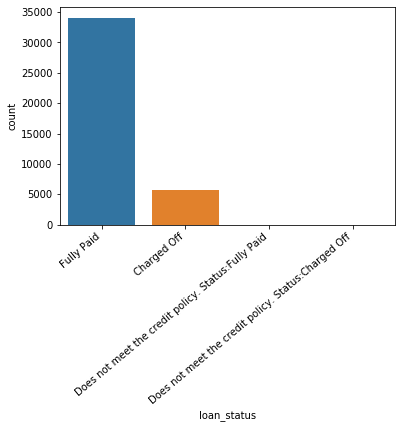

In [12]:
loan_status_division = sns.countplot(loan_nonulls['loan_status'])
loan_status_division.set_xticklabels(loan_status_division.get_xticklabels(), rotation=40, ha="right")
loan_status_division

In [13]:
# Due to the large number of records in the database, I decided to delete all lines containing any nulls, without completing records with estimated values (mean, dominants etc)

loan_nonulls.dropna(inplace=True)

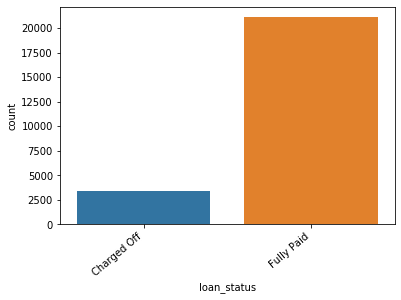

In [14]:
# I check again the dependent variable, to prevent myself from deleting too many records with "Charged off" status

loan_status_division = sns.countplot(loan_nonulls['loan_status'])
loan_status_division.set_xticklabels(loan_status_division.get_xticklabels(), rotation=40, ha="right")
loan_status_division

In [15]:
# I also decided to see if there are any columns that take only one value and remove them as well, because they do not provide any information for future analysis

loan_nonulls.apply(lambda x: len(x.unique()))

id                            24444
loan_amnt                       768
funded_amnt                     942
funded_amnt_inv                6247
term                              2
int_rate                        330
installment                   11276
grade                             7
sub_grade                        35
emp_title                     19595
emp_length                       11
home_ownership                    4
annual_inc                     3788
verification_status               3
issue_d                          51
loan_status                       2
pymnt_plan                        1
url                           24444
desc                          24229
purpose                          14
title                         13392
zip_code                        788
addr_state                       48
dti                            2767
delinq_2yrs                       9
earliest_cr_line                490
fico_range_low                   34
fico_range_high             

In [16]:
final_loan_data = loan_nonulls.drop(columns=['pymnt_plan','initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','hardship_flag','disbursement_method'])

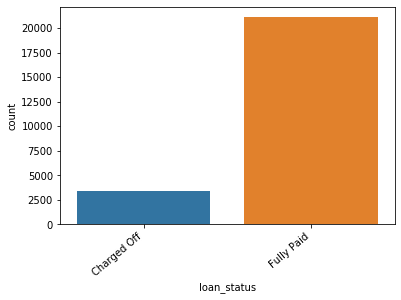

In [17]:
loan_status_division = sns.countplot(final_loan_data['loan_status'])
loan_status_division.set_xticklabels(loan_status_division.get_xticklabels(), rotation=40, ha="right")
loan_status_division

In [18]:
final_loan_data.dtypes

id                          object
loan_amnt                  float64
funded_amnt                float64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                float64
earliest_cr_line            object
fico_range_low             float64
fico_range_high            float64
inq_last_6mths             float64
open_acc            

In [19]:
# I'm changing the loan_status dependent variable that I'm going to investigate into a quantitative binary variable with values 0 and 1

final_loan_data['loan_status'] = final_loan_data['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})

I convert all the qualitative variables that I can, into numeric ordinal variables and assign them ranks so that it is possible to calculate the correlation and conduct further analysis

In [20]:
# The term variable means the loan repayment date (set by the company) that always takes one of two options - 36 months or 60 months

final_loan_data['term'] = final_loan_data['term'].map({' 36 months': 0, ' 60 months': 1})

# Variable debt_settlement_flag changed to binary variable

final_loan_data['debt_settlement_flag'] = final_loan_data['debt_settlement_flag'].map({'N': 0, 'Y': 1})

# Verification_status variable changed to One Hot Encoding

verif_status_one_hot = pd.get_dummies(final_loan_data['verification_status'].astype('object'))
final_loan_data = pd.concat([final_loan_data, verif_status_one_hot], axis=1)
final_loan_data = final_loan_data.rename({'Not Verified': 'Status Not Verified', 'Source Verified': 'Source Verified', 'Verified': 'Status Verified'}, axis='columns')

In [21]:
# Variable grade. In the materials for the project there are no details on loan grades, and each company has its own classification system. For the purpose of this analysis I assumed that they are all equal in scale and I have ordered them according to the alphabet as it is in most of financial companies

# The sub_grade variable contains basically the same information, but more detailed (each letter class is additionally divided into subclasses marked with a number from 1 to 5. Therefore, I decided to remove the grade column and leave only sub_grade data, converting it into ranks (35 values)

final_loan_data.drop(columns=['grade'], inplace=True)
final_loan_data['sub_grade'] = final_loan_data['sub_grade'].map({'A1': 0,'A2': 1,'A3': 2,'A4': 3,'A5': 4,'B1': 5,'B2': 6,'B3': 7,'B4': 8,'B5': 9,'C1': 10,'C2': 11,'C3': 12,'C4': 13,'C5': 14,'D1': 15,'D2': 16,'D3': 17,'D4': 18,'D5': 19,'E1': 20,'E2': 21,'E3': 22,'E4': 23,'E5': 24,'F1': 25,'F2': 26,'F3': 27,'F4': 28,'F5': 29,'G1': 30,'G2': 31,'G3': 32,'G4': 33,'G5': 34})

In [22]:
# The emp_length variable (employment time)

final_loan_data['emp_length'] = final_loan_data['emp_length'].map({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10})

In [23]:
# The int_rate variable - I remove the percent sign from the string and change the data type from object to float

final_loan_data['int_rate'] = final_loan_data['int_rate'].map(lambda x: x.rstrip('%'))
final_loan_data['int_rate'] = pd.to_numeric(final_loan_data['int_rate'])

In [24]:
# The revol_util variable - I remove the percent sign from the string and change the data type from object to float

final_loan_data['revol_util'] = final_loan_data['revol_util'].map(lambda x: x.rstrip('%'))
final_loan_data['revol_util'] = pd.to_numeric(final_loan_data['revol_util'])

In [25]:
# Change issue_d to date format

final_loan_data['issue_d'] = pd.to_datetime(final_loan_data['issue_d'])

In [26]:
# I change earliest_cr_line variable to date format

final_loan_data['earliest_cr_line'] = pd.to_datetime(final_loan_data['earliest_cr_line'])

In [27]:
# I change the variable last_pymnt_d to the date format

final_loan_data['last_pymnt_d'] = pd.to_datetime(final_loan_data['last_pymnt_d'])

In [28]:
# I change the variable last_credit_pull_d to the date format

final_loan_data['last_credit_pull_d'] = pd.to_datetime(final_loan_data['last_credit_pull_d'])

In [29]:
# I convert home_ownership variable to One Hot Encoding

home_own__one_hot = pd.get_dummies(final_loan_data['home_ownership'].astype('object'))
final_loan_data = pd.concat([final_loan_data, home_own__one_hot], axis=1)
final_loan_data = final_loan_data.rename({'NONE': 'No home ownership', 'RENT': 'Renting home', 'MORTGAGE': 'Home mortage', 'OWN': 'Home owner', 'OTHER':'Other type of home ownership'}, axis='columns')

In [30]:
# I check what the final cleaned database looks like

final_loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,...,last_fico_range_low,pub_rec_bankruptcies,debt_settlement_flag,Status Not Verified,Source Verified,Status Verified,Home mortage,Other type of home ownership,Home owner,Renting home
1,1077430,2500.0,2500.0,2500.0,1,15.27,59.83,13,Ryder,0,...,0.0,0.0,0,0,1,0,0,0,0,1
3,1076863,10000.0,10000.0,10000.0,0,13.49,339.31,10,AIR RESOURCES BOARD,10,...,600.0,0.0,0,0,1,0,0,0,0,1
4,1075358,3000.0,3000.0,3000.0,1,12.69,67.79,9,University Medical Group,1,...,680.0,0.0,0,0,1,0,0,0,0,1
6,1069639,7000.0,7000.0,7000.0,1,15.96,170.08,14,Southern Star Photography,8,...,650.0,0.0,0,1,0,0,0,0,0,1
7,1072053,3000.0,3000.0,3000.0,0,18.64,109.43,20,MKC Accounting,9,...,685.0,0.0,0,0,1,0,0,0,0,1


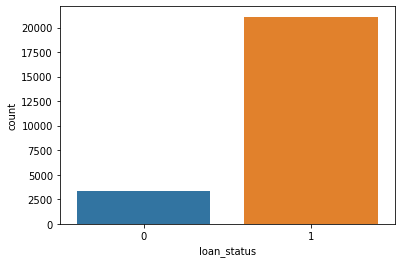

In [31]:
loan_status_division = sns.countplot(final_loan_data['loan_status'])
loan_status_division

In [32]:
final_loan_data.shape

(24444, 53)

In [33]:
final_loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'pub_rec_bankruptcies', 'debt_settlement_flag', 'Status Not Verified',
       'Source Verified', 'Status Verified', 'Home mortage',
       'Other type of home ownership', 'Home owner', 'Renting home'],
      dtype='object')

__<h>EDA</h>__

In [34]:
# Correlation matrix:

df_all = pd.concat([final_loan_data],axis=1)
corr = df_all.corr() 
corr

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,loan_status,...,last_fico_range_low,pub_rec_bankruptcies,debt_settlement_flag,Status Not Verified,Source Verified,Status Verified,Home mortage,Other type of home ownership,Home owner,Renting home
loan_amnt,1.000000,0.978495,0.941160,0.367981,0.323719,0.923091,0.313571,0.161595,0.291127,-0.065010,...,0.063437,-0.030472,0.037837,-0.330565,-0.089378,0.428566,0.186078,-0.007516,-0.041400,-0.162950
funded_amnt,0.978495,1.000000,0.963345,0.346039,0.329139,0.952885,0.314257,0.161015,0.284306,-0.061837,...,0.062784,-0.031976,0.035847,-0.324989,-0.087743,0.421222,0.180084,-0.009816,-0.038695,-0.158088
funded_amnt_inv,0.941160,0.963345,1.000000,0.366931,0.316758,0.906310,0.291282,0.168158,0.270011,-0.043234,...,0.067598,-0.040209,0.029773,-0.329191,-0.068127,0.407901,0.176060,-0.029554,-0.033030,-0.154540
term,0.367981,0.346039,0.366931,1.000000,0.447749,0.095002,0.433080,0.116680,0.050755,-0.158747,...,-0.066072,0.017986,0.054415,-0.261060,0.060486,0.219911,0.111083,-0.036298,-0.015186,-0.098212
int_rate,0.323719,0.329139,0.316758,0.447749,1.000000,0.297834,0.961588,0.013703,0.062715,-0.201999,...,-0.246879,0.086268,0.047691,-0.185135,-0.004239,0.198583,-0.050664,-0.000581,-0.009012,0.055072
installment,0.923091,0.952885,0.906310,0.095002,0.297834,1.000000,0.288173,0.132106,0.287309,-0.034528,...,0.064495,-0.028334,0.025105,-0.272225,-0.103211,0.379707,0.146762,0.001396,-0.036436,-0.127492
sub_grade,0.313571,0.314257,0.291282,0.433080,0.961588,0.288173,1.000000,0.011729,0.065534,-0.196970,...,-0.237916,0.085760,0.052691,-0.184312,-0.000268,0.194125,-0.042097,-0.000300,-0.014312,0.049230
emp_length,0.161595,0.161015,0.168158,0.116680,0.013703,0.132106,0.011729,1.000000,0.117580,-0.023702,...,0.007539,0.063146,0.006151,-0.043774,-0.053835,0.094737,0.247260,-0.014790,0.020892,-0.254776
annual_inc,0.291127,0.284306,0.270011,0.050755,0.062715,0.287309,0.065534,0.117580,1.000000,0.039395,...,0.061170,-0.012770,0.008437,-0.112930,-0.019804,0.136705,0.216620,0.003238,-0.053663,-0.188383
loan_status,-0.065010,-0.061837,-0.043234,-0.158747,-0.201999,-0.034528,-0.196970,-0.023702,0.039395,1.000000,...,0.400466,-0.046581,-0.154155,0.051456,-0.001013,-0.053212,0.016044,-0.009810,0.000370,-0.014931


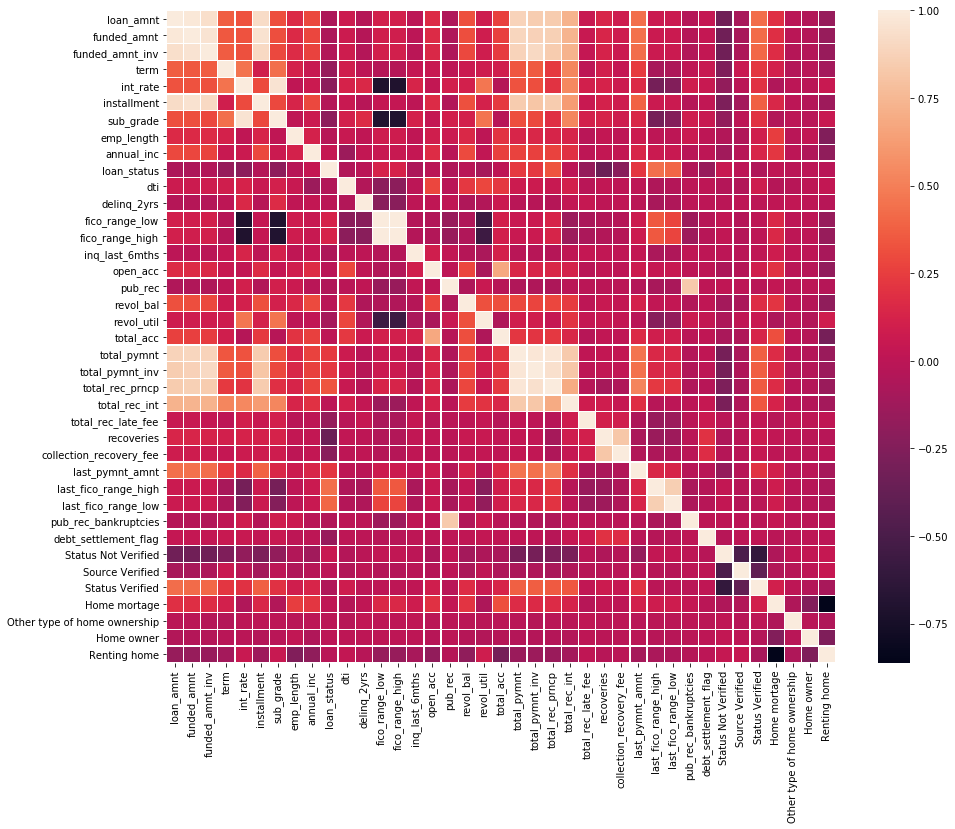

In [35]:
fig, ax = plt.pyplot.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidth=0.3)

In [36]:
charged_off_loan = final_loan_data[final_loan_data.loan_status == 0]
fully_paid_loan = final_loan_data[final_loan_data.loan_status == 1]

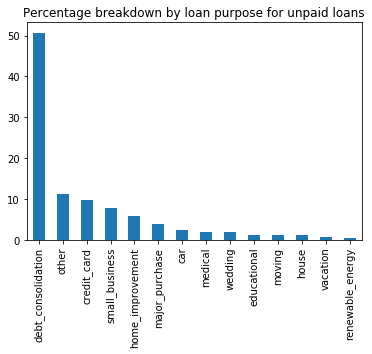

In [37]:
purpose_perc_unpaid = charged_off_loan['purpose'].value_counts()/charged_off_loan['purpose'].value_counts().sum()*100
purpose_perc_unpaid.plot(kind='bar', title = 'Percentage breakdown by loan purpose for unpaid loans')

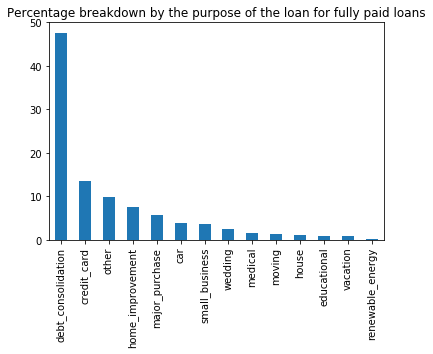

In [38]:
purpose_perc_paid = fully_paid_loan['purpose'].value_counts()/fully_paid_loan['purpose'].value_counts().sum()*100
purpose_perc_paid.plot(kind='bar', title = 'Percentage breakdown by the purpose of the loan for fully paid loans')

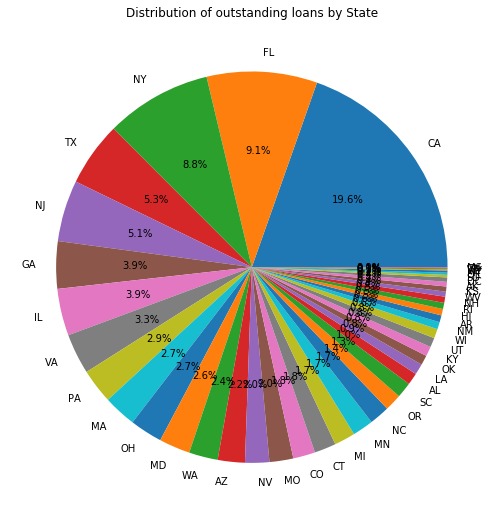

In [39]:
plt.pyplot.title('Distribution of outstanding loans by State')
charged_off_loan['addr_state'].value_counts().plot(kind='pie', figsize=(15, 9), autopct='%1.1f%%', label='')

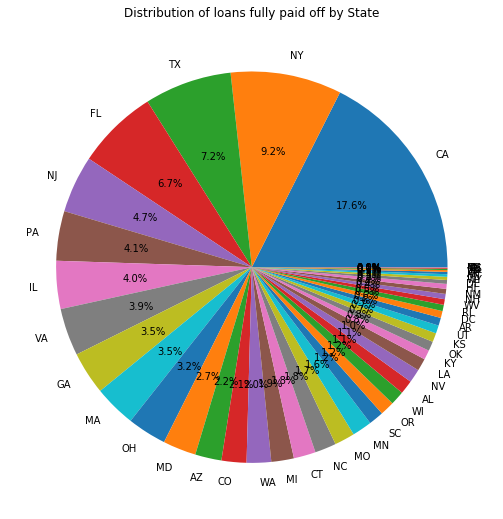

In [40]:
plt.pyplot.title('Distribution of loans fully paid off by State')
fully_paid_loan['addr_state'].value_counts().plot(kind='pie', figsize=(15, 9),  autopct='%1.1f%%', label='')

__<h>Questions:</h>__

__<b>a) How does the FICO score relate to the borrower's probability of repaying the loan?</b>__

Text(0.5, 1.0, 'The relationship between the FICO lower bound at the time the loan was drawn and the repayment status of the loan \n')

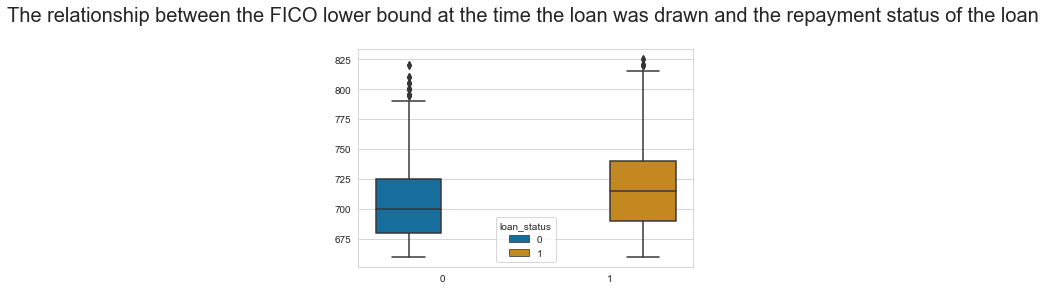

In [41]:
sns.set_style(style='whitegrid')
sns.boxplot(y='fico_range_low', x='loan_status', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='loan_status')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.title("The relationship between the FICO lower bound at the time the loan was drawn and the repayment status of the loan \n", size=20)

In [42]:
print('The correlation coefficient for these two variables is', final_loan_data['fico_range_low'].corr(final_loan_data['loan_status']))

The correlation coefficient for these two variables is 0.12411292143215834


<b>Conclusion: </b>There is no significant correlation between the variables. Standard deviation similar in both groups. The location of the median shows a similar distribution of amounts in both groups.

Text(0.5, 1.0, 'Relationship between the FICO upper limit at the time the loan was drawn up and the repayment status of the loan \n')

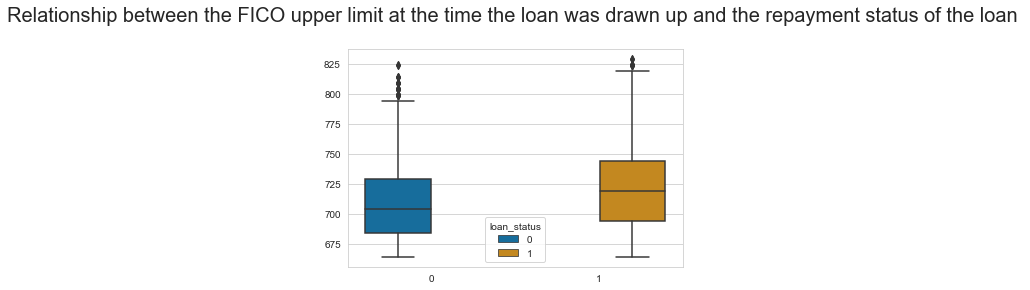

In [43]:
sns.set_style(style='whitegrid')
sns.boxplot(y='fico_range_high', x='loan_status', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='loan_status')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.title("Relationship between the FICO upper limit at the time the loan was drawn up and the repayment status of the loan \n", size=20)

In [44]:
print('The correlation coefficient for these two variables is', final_loan_data['fico_range_high'].corr(final_loan_data['loan_status']))

The correlation coefficient for these two variables is 0.12411292143215834


<b>Conclusion: </b>There is no significant correlation between the variables. Standard deviation similar in both groups. The location of the median shows a similar distribution of amounts in both groups.

Text(0.5, 1.0, 'The relationship between the FICO lower bound at the end of the loan maturity and the loan repayment status \n')

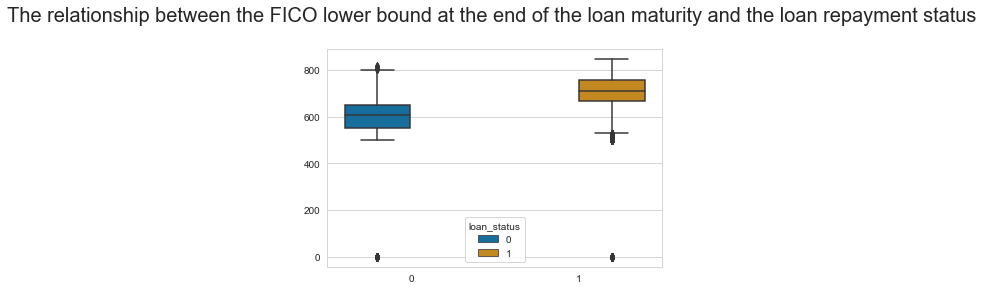

In [45]:
sns.set_style(style='whitegrid')
sns.boxplot(y='last_fico_range_low', x='loan_status', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='loan_status')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.title("The relationship between the FICO lower bound at the end of the loan maturity and the loan repayment status \n", size=20)

In [46]:
print('The correlation coefficient for these two variables is', final_loan_data['last_fico_range_low'].corr(final_loan_data['loan_status']))

The correlation coefficient for these two variables is 0.40046575106359145


<b>Conclusion: </b>Slightly positive correlation between the variables. Standard deviation similar in both groups. The location of the median shows a similar distribution of amounts in both groups. The variable takes higher values ​​for the group with repaid loans.

Text(0.5, 1.0, 'Relationship between the FICO upper limit at the end of the loan maturity and the loan repayment status \n')

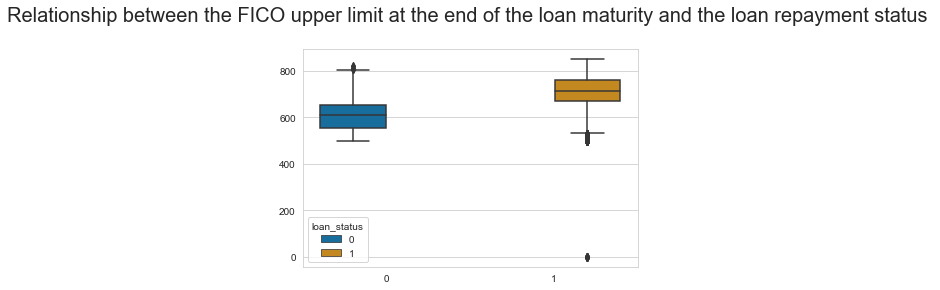

In [47]:
sns.set_style(style='whitegrid')
sns.boxplot(y='last_fico_range_high', x='loan_status', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='loan_status')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.title("Relationship between the FICO upper limit at the end of the loan maturity and the loan repayment status \n", size=20)

In [48]:
print('The correlation coefficient for these two variables is', final_loan_data['last_fico_range_high'].corr(final_loan_data['loan_status']))

The correlation coefficient for these two variables is 0.4378784583278348


<b>Conclusion: </b>Slightly positive correlation between the variables. Standard deviation similar in both groups. The location of the median shows a similar distribution of amounts in both groups. The variable takes higher values ​​for the group with repaid loans.

__<b>b) How is the credit age related to the probability of default and is this risk independent or related to the FICO outcome?</b>__

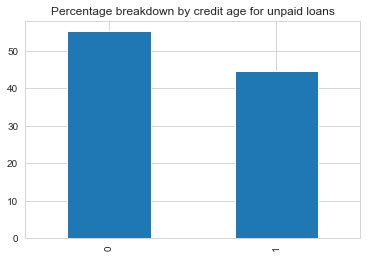

In [49]:
loan_vs_term_perc_unpaid = charged_off_loan['term'].value_counts()/charged_off_loan['term'].value_counts().sum()*100
loan_vs_term_perc_unpaid.plot(kind='bar', title = 'Percentage breakdown by credit age for unpaid loans')

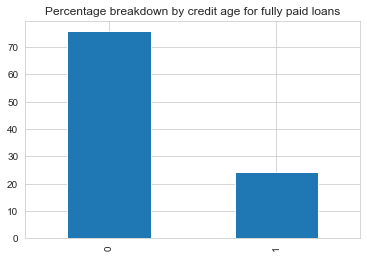

In [50]:
loan_vs_term_perc_paid = fully_paid_loan['term'].value_counts()/fully_paid_loan['term'].value_counts().sum()*100
loan_vs_term_perc_paid.plot(kind='bar', title = 'Percentage breakdown by credit age for fully paid loans')

In [51]:
print('The correlation coefficient for these two variables is', final_loan_data['term'].corr(final_loan_data['loan_status']))

The correlation coefficient for these two variables is -0.1587465792273985


Text(0.5, 1.0, 'Relationship between the FICO lower bound at the time of loan and the term of the loan \n\n0 = 36 months\n1 = 60 months\n')

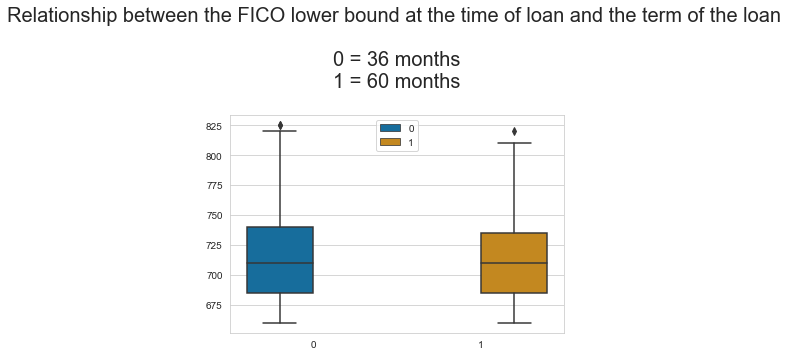

In [52]:
sns.set_style(style='whitegrid')
sns.boxplot(y='fico_range_low', x='term', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='term')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.legend(loc='upper center')
plt.pyplot.title("Relationship between the FICO lower bound at the time of loan and the term of the loan \n\n0 = 36 months\n1 = 60 months\n", size=20)

In [53]:
print('The correlation coefficient for these two variables is', final_loan_data['fico_range_low'].corr(final_loan_data['term']))

The correlation coefficient for these two variables is -0.025616020436323016


<b>Conclusion: </b>No significant correlation between the variables (very low Pearson's r correlation coefficient. Standard deviation similar in both groups. The location of the dominant indicates a similar distribution of the number in both groups. No visible differences between the groups.

Text(0.5, 1.0, 'Relationship between the FICO upper limit at the time of borrowing and the duration of the loan \n\n0 = 36 months\n1 = 60 months\n')

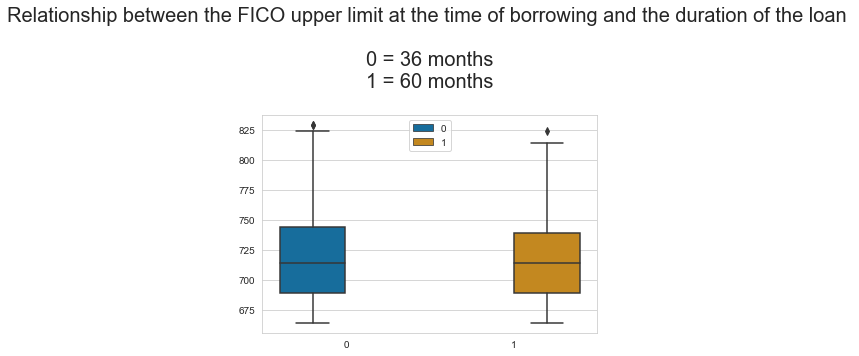

In [54]:
sns.set_style(style='whitegrid')
sns.boxplot(y='fico_range_high', x='term', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='term')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.legend(loc='upper center')
plt.pyplot.title("Relationship between the FICO upper limit at the time of borrowing and the duration of the loan \n\n0 = 36 months\n1 = 60 months\n", size=20)

In [55]:
print('The correlation coefficient for these two variables is', final_loan_data['fico_range_high'].corr(final_loan_data['term']))

The correlation coefficient for these two variables is -0.025616020436323016


<b>Conclusion: </b>No significant correlation between the variables (very low Pearson's r correlation coefficient. Standard deviation similar in both groups. The location of the dominant indicates a similar distribution of the number in both groups. No visible differences between the groups.

Text(0.5, 1.0, 'Relationship between the FICO lower bound at the end of the loan maturity and the loan term \n\n0 = 36 months\n1 = 60 months\n')

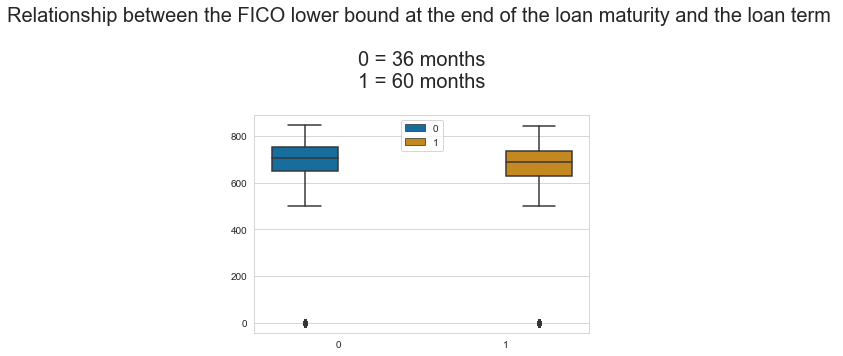

In [56]:
sns.set_style(style='whitegrid')
sns.boxplot(y='last_fico_range_low', x='term', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='term')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.legend(loc='upper center')
plt.pyplot.title("Relationship between the FICO lower bound at the end of the loan maturity and the loan term \n\n0 = 36 months\n1 = 60 months\n", size=20)

In [57]:
print('The correlation coefficient for these two variables is', final_loan_data['term'].corr(final_loan_data['last_fico_range_low']))

The correlation coefficient for these two variables is -0.06607215409793751


<b>Conclusion: </b>No significant correlation between the variables (very low Pearson's r correlation coefficient. Standard deviation similar in both groups. The location of the dominant indicates a similar distribution of the number in both groups. No visible differences between the groups.

Text(0.5, 1.0, 'Relationship between the FICO upper limit at the end of the loan maturity and the loan term \n\n0 = 36 months\n1 = 60 months\n')

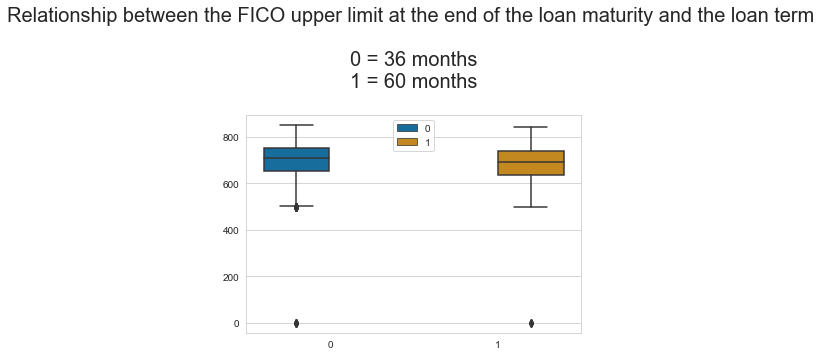

In [58]:
sns.set_style(style='whitegrid')
sns.boxplot(y='last_fico_range_high', x='term', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='term')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.legend(loc='upper center')
plt.pyplot.title("Relationship between the FICO upper limit at the end of the loan maturity and the loan term \n\n0 = 36 months\n1 = 60 months\n", size=20)

In [59]:
print('The correlation coefficient for these two variables is', final_loan_data['term'].corr(final_loan_data['last_fico_range_high']))

The correlation coefficient for these two variables is -0.08450830157330909


<b>Conclusion: </b>No significant correlation between the variables (very low Pearson's r correlation coefficient. Standard deviation similar in both groups. The location of the dominant indicates a similar distribution of the number in both groups. No visible differences between the groups.

__<b>c) How is the home mortgage status related to the likelihood of not paying the loan?</b>__

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

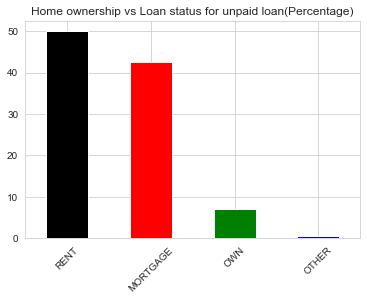

In [60]:
homeown_perc_unpaid = charged_off_loan['home_ownership'].value_counts()/charged_off_loan['home_ownership'].value_counts().sum()*100
homeown_perc_unpaid.plot(kind='bar', title = 'Home ownership vs Loan status for unpaid loan(Percentage)', color=['black', 'red', 'green', 'blue'])
plt.pyplot.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

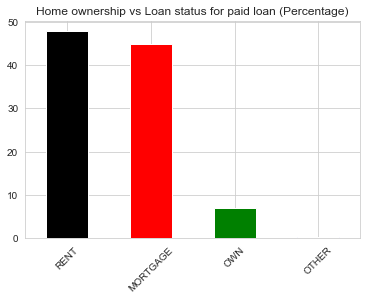

In [61]:
homeown_perc_paid = fully_paid_loan['home_ownership'].value_counts()/fully_paid_loan['home_ownership'].value_counts().sum()*100
homeown_perc_paid.plot(kind='bar', title = 'Home ownership vs Loan status for paid loan (Percentage)', color=['black', 'red', 'green', 'blue'])
plt.pyplot.xticks(rotation=45)

__<b>d) How is annual revenue related to the probability of not paying the loan?</b>__

Text(0.5, 1.0, 'Relationship between annual income and loan repayment status \n')

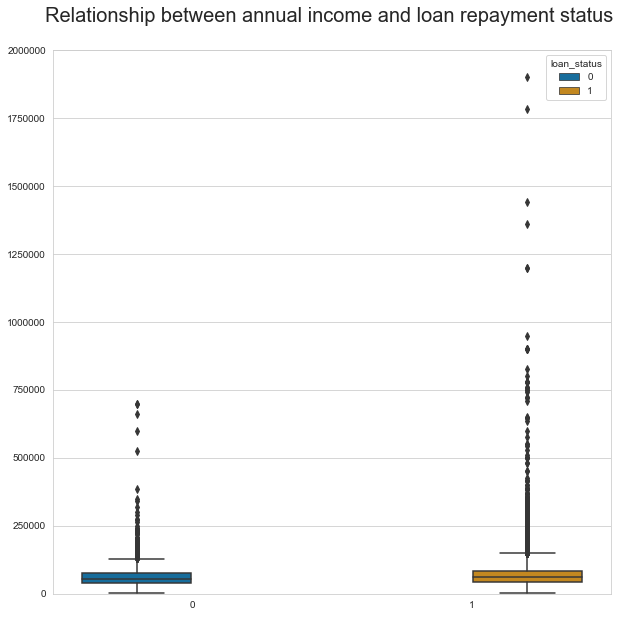

In [62]:
sns.set_style(style='whitegrid')
plt.pyplot.figure(figsize=(10,10))
sns.boxplot(y='annual_inc', x='loan_status', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='loan_status')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.ylim(0, 2000000)
plt.pyplot.title("Relationship between annual income and loan repayment status \n", size=20)

In [63]:
print('The correlation coefficient for these two variables is', final_loan_data['annual_inc'].corr(final_loan_data['loan_status']))

The correlation coefficient for these two variables is 0.03939458232760217


<b>Conclusion: </b>Lack of significant correlation between the variables (very low Pearson's r correlation coefficient. Standard deviation similar in both groups. The location of the dominant indicates a similar distribution of numbers in both groups. A large number of outliers in the second group, but no differences between the groups.

__<b>e) How is your employment history related to the probability of not paying the loan?</b>__

Text(0.5, 1.0, 'Employment length vs Loan status \n')

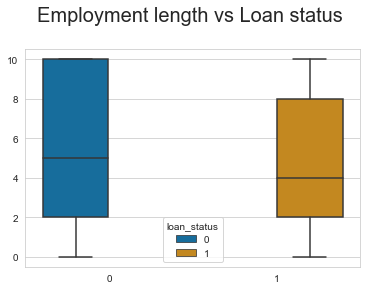

In [64]:
sns.set_style(style='whitegrid')
sns.boxplot(y='emp_length', x='loan_status', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='loan_status')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.title("Employment length vs Loan status \n", size=20)

In [65]:
print('The correlation coefficient for these two variables is', final_loan_data['emp_length'].corr(final_loan_data['loan_status']))

The correlation coefficient for these two variables is -0.02370190879670693


__<b>f) How is the amount of the requested loan related to the probability of not paying the loan?</b>__

Text(0.5, 1.0, 'The relationship between the amount of the loan and the loan repayment status \n')

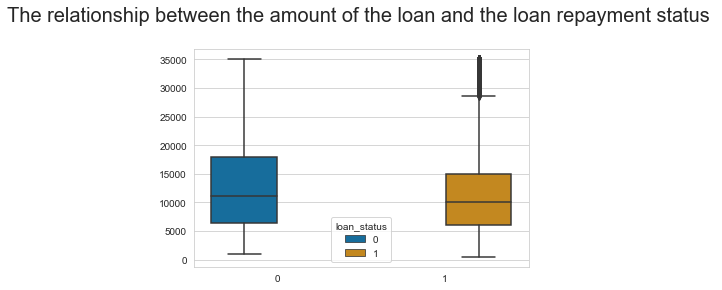

In [66]:
sns.set_style(style='whitegrid')
sns.boxplot(y='loan_amnt', x='loan_status', 
                 data=final_loan_data, 
                 palette="colorblind", 
                 hue='loan_status')
plt.pyplot.xlabel(xlabel='')
plt.pyplot.ylabel(ylabel='')
plt.pyplot.title("The relationship between the amount of the loan and the loan repayment status \n", size=20)

In [67]:
print('The correlation coefficient for these two variables is', final_loan_data['loan_amnt'].corr(final_loan_data['loan_status']))

The correlation coefficient for these two variables is -0.06500962358861068


__<h>Conclusions summary:</h>__

<b>There was no significant correlation between any of the variables mentioned in the questions. The strongest (although still weak) positive correlation was between loan repayment and the FICO level at the end of the loan period (the correlation coefficient was just over 0.4).

No correlation has been demonstrated between the level of the FICO (neither at the time of taking the loan nor at the end of the loan period) with the length of the loan period.

The distribution of loan allocation in both groups (paid and unpaid loans) is similar, however, twice the percentage (7.7% vs 3.7%) of allocating repayment to own small business occurs in the group of unpaid loans. Further analysis needed.

Percentage share in both groups (repaid and unpaid loans) by address of residence (state in the US) is similar.
</b>

# __Feature Engineering – creating 20 new variables__

During the database cleansing and preparation process, I have already added the following 11 new variables:

1. I changed the categorical data in the form of text from the variable issue_d to the date format
2. I changed the categorical data in the form of text from the earliest_cr_line variable to the date format
3. I changed the categorical data in the form of text from the last_pymnt_d variable to the date format
4. I changed the categorical data in the form of text from the last_credit_pull_d variable to the date format
5. I changed the categorical data in the form of text from the variable term to a binary variable
6. I changed the categorical data in the form of text from the variable debt_settlement_flag to a binary variable
7. I changed the categorical data in the form of text from the verification_status variable to a binary variable
8. I changed the categorical data in the form of text from the sub_grade variable to a numeric variable
9. I changed the categorical data in the form of text from the emp_length (employment time) variable to a numeric variable, giving the time intervals a rank
10. I changed the categorical data in the form of text from the variable int_rate to a numerical result
11. I changed the categorical data in the form of text from the revol_util variable to a numerical result

Moreover, while transforming the available data, I introduced an additional 9 variables, presented below

In [68]:
# New variable emp_sector divides borrowers into 5 industries based on keywords appearing in the emp_title descriptive variable

def f(row):
    if any(ele in row for ele in ['U.S.', 'US', 'State', 'Government', 'City', 'United States', 'County', 'national', 'National']) == True:
        val = 'Public sector'
    elif any(ele in row for ele in ['Bank', 'bank', 'Invest', 'invest', 'Insurance', 'insurance']) == True:
        val = 'Banking and Finance'
    elif any(ele in row for ele in ['University','School', 'Schools', 'College', 'university','school', 'schools', 'college']) == True:
        val = 'Education'
    elif any(ele in row for ele in ['Health', 'Clinic', 'Medical', 'Hospital', 'Therapies', 'Therapy', 'health', 'clinic', 'medical', 'hospital', 'therapies', 'therapy', 'HEALTH', 'Pharma', 'pharma', 'nurs', 'Nurs']) == True:
        val = 'Health Care'
    elif any(ele in row for ele in ['systems', 'Systems', 'software', 'Software', 'tech', 'Tech', 'Computer', 'computer', 'Electronics', 'electronics', 'Engine',  'engine']) == True:
        val = 'IT and Engineering'
    elif any(ele in row for ele in ['walmart', 'WalMart', 'Wal-Mart', 'Walmart', 'store', 'stores', 'supermarket', 'Store', 'Stores', 'Supermarket', 'shop', 'Shop']) == True:
        val = 'Commerce and Supermarkets'
    else:
        val = 'Other'
    return val

final_loan_data['emp_sector'] = final_loan_data['emp_title'].apply(f)

In [69]:
final_loan_data['emp_sector'].value_counts()

Other                        17626
Public sector                 2470
Health Care                   1363
Education                     1157
IT and Engineering             836
Banking and Finance            795
Commerce and Supermarkets      197
Name: emp_sector, dtype: int64

In [70]:
# New NorthSouth binary variable that is 0 when the borrower is from the South and 1 when the borrower is from the North state of US

def f(row):
    if any(ele in row for ele in ['CT', 'IL', 'IN', 'IA', 'ME', 'MA', 'MI', 'MN', 'NH', 'NJ', 'NY', 'OH', 'PA', 'RI', 'VT', 'WI']) == True:
        val = 1
    else:
        val = 0
    return val

final_loan_data['NorthSouth'] = final_loan_data['addr_state'].apply(f)

In [71]:
# New quantitative variable - length of the loan period in months (term_in_months)

final_loan_data['term_in_months']  = [36 if x == 0 else 60 for x in final_loan_data['term']] 

In [72]:
# New quantitative variable income_during_term - full income received during the loan term (monthly income times credit time)

final_loan_data['income_during_term'] = (final_loan_data['annual_inc']/12) * final_loan_data['term_in_months']

In [73]:
# New categorical variable - last_fico_range_low_rating: last FICO rating (lower bound)

rating = []

for row in final_loan_data['last_fico_range_low']:
    if row < 580:    rating.append('last_fico_low_Poor')
    elif row < 669:    rating.append('last_fico_low_Fair')
    elif row < 739:    rating.append('last_fico_low_Good')
    elif row < 799:    rating.append('last_fico_low_Very Good')
    else:    rating.append('last_fico_low_Exceptional')

final_loan_data['last_fico_range_low_rating'] = rating

In [74]:
# New categorical variable - last_fico_range_high_rating: last FICO rating (upper bound)

rating = []

for row in final_loan_data['last_fico_range_high']:
    if row < 580:    rating.append('last_fico_high_Poor')
    elif row < 669:    rating.append('last_fico_high_Fair')
    elif row < 739:    rating.append('last_fico_high_Good')
    elif row < 799:    rating.append('last_fico_high_Very Good')
    else:    rating.append('last_fico_high_Exceptional')

final_loan_data['last_fico_range_high_rating'] = rating

In [75]:
# New quantitative variable - credit history length in days (calculaded as a difference between issue_d (date of taking the loan) and earliest_cr_line (first credit verification)

final_loan_data['credit_history_length'] = final_loan_data['issue_d'] - final_loan_data['earliest_cr_line']
final_loan_data['credit_history_length'] = final_loan_data['credit_history_length'].dt.days

In [76]:
# New quantitative variable - time_till_last_pymnt (time between taking the loan and the regular loan repayment

final_loan_data['time_till_last_pymnt'] = final_loan_data['last_pymnt_d'] - final_loan_data['issue_d']
final_loan_data['time_till_last_pymnt'] = final_loan_data['time_till_last_pymnt'].dt.days

In [77]:
# New quantitative variable - time_btw_last_pull_and_pymnt (time between last loan payment and last credit verification in days)

final_loan_data['time_btw_last_pull_and_pymnt'] = final_loan_data['last_credit_pull_d'] - final_loan_data['last_pymnt_d']
final_loan_data['time_btw_last_pull_and_pymnt'] = final_loan_data['time_btw_last_pull_and_pymnt'].dt.days

In [78]:
final_loan_data.shape

(24444, 62)

In [79]:
# New correlation matrix with includes newly created variables:

df_all = pd.concat([final_loan_data],axis=1)
corr = df_all.corr() 
corr

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,loan_status,...,Home mortage,Other type of home ownership,Home owner,Renting home,NorthSouth,term_in_months,income_during_term,credit_history_length,time_till_last_pymnt,time_btw_last_pull_and_pymnt
loan_amnt,1.000000,0.978495,0.941160,0.367981,0.323719,0.923091,0.313571,0.161595,0.291127,-0.065010,...,0.186078,-0.007516,-0.041400,-0.162950,-0.004049,0.367981,0.367346,0.217128,0.079163,-0.047032
funded_amnt,0.978495,1.000000,0.963345,0.346039,0.329139,0.952885,0.314257,0.161015,0.284306,-0.061837,...,0.180084,-0.009816,-0.038695,-0.158088,-0.002237,0.346039,0.352440,0.209851,0.074538,-0.044769
funded_amnt_inv,0.941160,0.963345,1.000000,0.366931,0.316758,0.906310,0.291282,0.168158,0.270011,-0.043234,...,0.176060,-0.029554,-0.033030,-0.154540,-0.000915,0.366931,0.345806,0.208709,0.099201,-0.074787
term,0.367981,0.346039,0.366931,1.000000,0.447749,0.095002,0.433080,0.116680,0.050755,-0.158747,...,0.111083,-0.036298,-0.015186,-0.098212,-0.002566,1.000000,0.318815,0.088563,0.297678,-0.123848
int_rate,0.323719,0.329139,0.316758,0.447749,1.000000,0.297834,0.961588,0.013703,0.062715,-0.201999,...,-0.050664,-0.000581,-0.009012,0.055072,-0.008918,0.447749,0.184797,-0.090858,0.086898,0.065475
installment,0.923091,0.952885,0.906310,0.095002,0.297834,1.000000,0.288173,0.132106,0.287309,-0.034528,...,0.146762,0.001396,-0.036436,-0.127492,-0.001309,0.095002,0.278444,0.182146,-0.003200,-0.000679
sub_grade,0.313571,0.314257,0.291282,0.433080,0.961588,0.288173,1.000000,0.011729,0.065534,-0.196970,...,-0.042097,-0.000300,-0.014312,0.049230,-0.008549,0.433080,0.183015,-0.091511,0.086222,0.072867
emp_length,0.161595,0.161015,0.168158,0.116680,0.013703,0.132106,0.011729,1.000000,0.117580,-0.023702,...,0.247260,-0.014790,0.020892,-0.254776,0.021320,0.116680,0.131726,0.300676,0.044061,0.003012
annual_inc,0.291127,0.284306,0.270011,0.050755,0.062715,0.287309,0.065534,0.117580,1.000000,0.039395,...,0.216620,0.003238,-0.053663,-0.188383,-0.006891,0.050755,0.932726,0.215781,0.012010,-0.015282
loan_status,-0.065010,-0.061837,-0.043234,-0.158747,-0.201999,-0.034528,-0.196970,-0.023702,0.039395,1.000000,...,0.016044,-0.009810,0.000370,-0.014931,0.022485,-0.158747,-0.005125,0.011426,0.270877,-0.316508


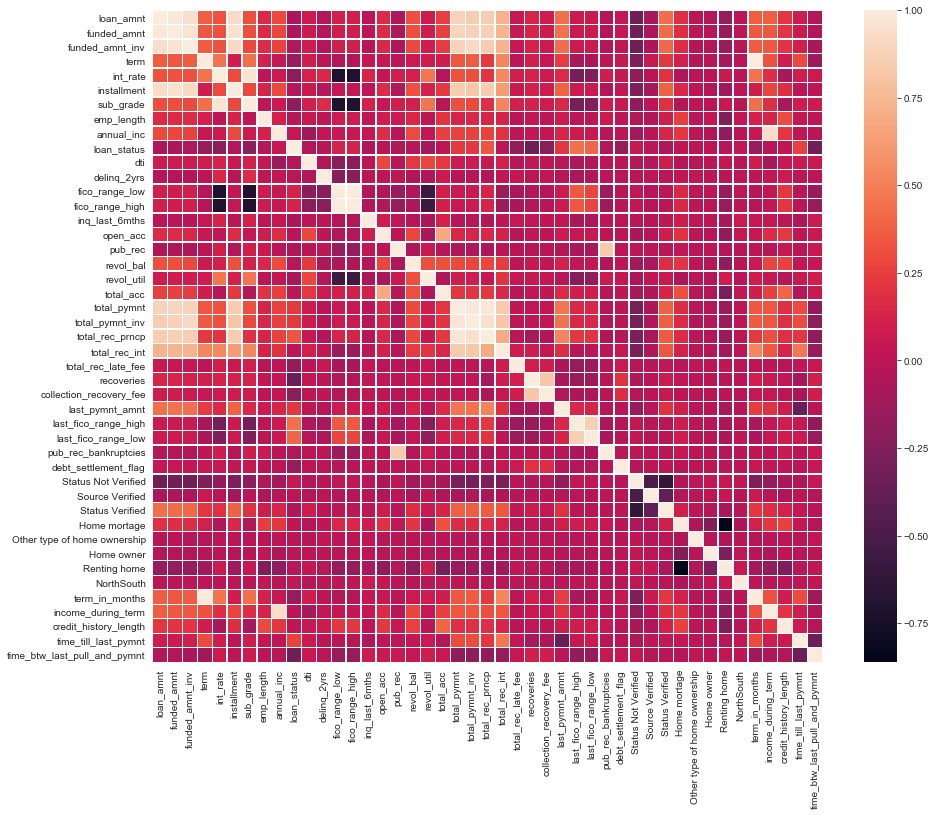

In [80]:
fig, ax = plt.pyplot.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidth=0.3)

In [81]:
charged_off_loan = final_loan_data[final_loan_data.loan_status == 0]
fully_paid_loan = final_loan_data[final_loan_data.loan_status == 1]

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

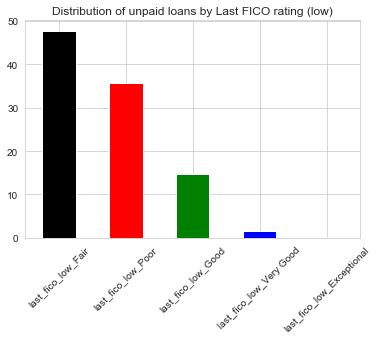

In [82]:
l_fico_rate_low_unpaid = charged_off_loan['last_fico_range_low_rating'].value_counts()/charged_off_loan['last_fico_range_low_rating'].value_counts().sum()*100
l_fico_rate_low_unpaid.plot(kind='bar', title = 'Distribution of unpaid loans by Last FICO rating (low)', color=['black', 'red', 'green', 'blue','orange','yellow'])
plt.pyplot.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

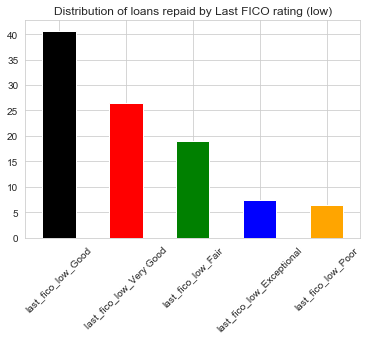

In [83]:
l_fico_rate_low_paid = fully_paid_loan['last_fico_range_low_rating'].value_counts()/fully_paid_loan['last_fico_range_low_rating'].value_counts().sum()*100
l_fico_rate_low_paid.plot(kind='bar', title = 'Distribution of loans repaid by Last FICO rating (low)', color=['black', 'red', 'green', 'blue','orange','yellow'])
plt.pyplot.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

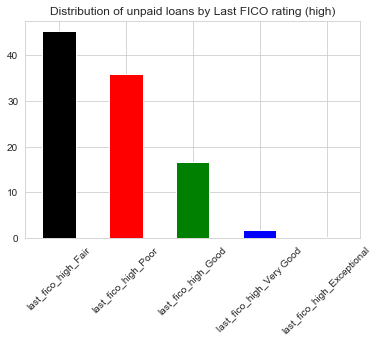

In [84]:
l_fico_rate_high_unpaid = charged_off_loan['last_fico_range_high_rating'].value_counts()/charged_off_loan['last_fico_range_high_rating'].value_counts().sum()*100
l_fico_rate_high_unpaid.plot(kind='bar', title = 'Distribution of unpaid loans by Last FICO rating (high)', color=['black', 'red', 'green', 'blue','orange','yellow'])
plt.pyplot.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

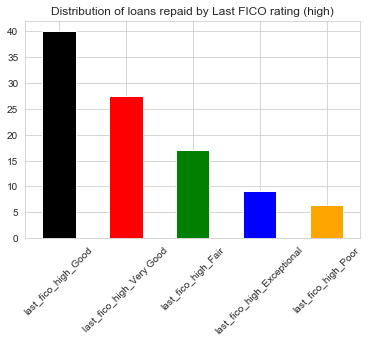

In [85]:
l_fico_rate_high_paid = fully_paid_loan['last_fico_range_high_rating'].value_counts()/fully_paid_loan['last_fico_range_high_rating'].value_counts().sum()*100
l_fico_rate_high_paid.plot(kind='bar', title = 'Distribution of loans repaid by Last FICO rating (high)', color=['black', 'red', 'green', 'blue','orange','yellow'])
plt.pyplot.xticks(rotation=45)

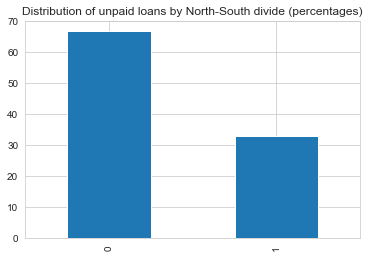

In [86]:
loan_vs_norsouth_perc_unpaid = charged_off_loan['NorthSouth'].value_counts()/charged_off_loan['NorthSouth'].value_counts().sum()*100
loan_vs_norsouth_perc_unpaid.plot(kind='bar', title = 'Distribution of unpaid loans by North-South divide (percentages)')

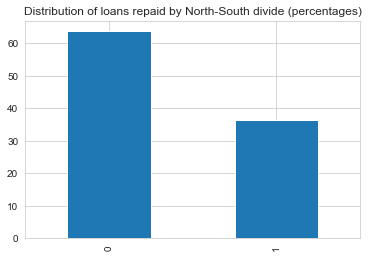

In [87]:
loan_vs_norsouth_perc_paid = fully_paid_loan['NorthSouth'].value_counts()/fully_paid_loan['NorthSouth'].value_counts().sum()*100
loan_vs_norsouth_perc_paid.plot(kind='bar', title = 'Distribution of loans repaid by North-South divide (percentages)')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

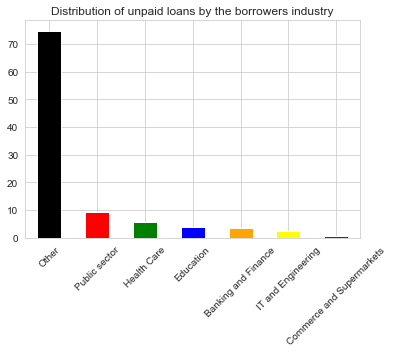

In [88]:
emp_sector_perc_unpaid = charged_off_loan['emp_sector'].value_counts()/charged_off_loan['emp_sector'].value_counts().sum()*100
emp_sector_perc_unpaid.plot(kind='bar', title = 'Distribution of unpaid loans by the borrower''s industry', color=['black', 'red', 'green', 'blue','orange','yellow','purple','pink'])
plt.pyplot.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

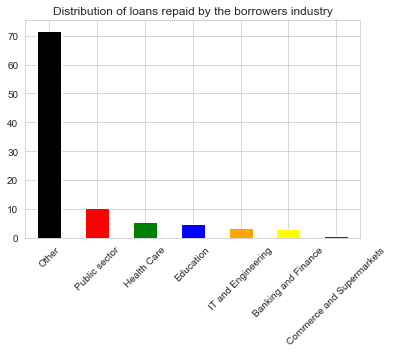

In [89]:
emp_sector_perc_paid = fully_paid_loan['emp_sector'].value_counts()/fully_paid_loan['emp_sector'].value_counts().sum()*100
emp_sector_perc_paid.plot(kind='bar', title = 'Distribution of loans repaid by the borrower''s industry', color=['black', 'red', 'green', 'blue','orange','yellow','purple','pink'])
plt.pyplot.xticks(rotation=45)

# __Model making - tasks:__

* a. Perform data clustering (try several methods for this purpose, at least 3) and check if there are any borrower segments, use appropriate methods to determine the optimal number of clusters
* 
* b. Train 5 different models, using a different algorithm for each one, and then compare their performance, take AUROC score as the model quality assessment metric.
* 
* c. Check the performance of previously used methods on compressed data with PCA, compare the results (AUROC score) with the models trained in the previous point.
* 
* d. Build the final model, the AUROC score of which will be >= 80%, remember to select important variables, cross-validation and fine-tune the model parameters, also think about class balancing.


In [90]:
# I import all the libraries that I will need for clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

<b/>I convert categorical variables to One Hot Encoding and add them to the main dataframe to be included in models</b>

In [91]:
emp_sector_one_hot = pd.get_dummies(final_loan_data['emp_sector'].astype('object'))
emp_sector_one_hot

,Banking and Finance,Commerce and Supermarkets,Education,Health Care,IT and Engineering,Other,Public sector
1,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0
7,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
39502,0,0,0,1,0,0,0
39544,1,0,0,0,0,0,0
39620,0,0,0,0,1,0,0
39631,0,0,0,0,0,1,0


In [92]:
last_fico_range_low_rating_one_hot = pd.get_dummies(final_loan_data['last_fico_range_low_rating'].astype('object'))
last_fico_range_low_rating_one_hot

,last_fico_low_Exceptional,last_fico_low_Fair,last_fico_low_Good,last_fico_low_Poor,last_fico_low_Very Good
1,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0
6,0,1,0,0,0
7,0,0,1,0,0
...,...,...,...,...,...
39502,0,1,0,0,0
39544,0,0,1,0,0
39620,0,0,0,1,0
39631,0,0,1,0,0


In [93]:
last_fico_range_high_rating_one_hot = pd.get_dummies(final_loan_data['last_fico_range_high_rating'].astype('object'))
last_fico_range_high_rating_one_hot

,last_fico_high_Exceptional,last_fico_high_Fair,last_fico_high_Good,last_fico_high_Poor,last_fico_high_Very Good
1,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0
6,0,1,0,0,0
7,0,0,1,0,0
...,...,...,...,...,...
39502,0,1,0,0,0
39544,0,0,1,0,0
39620,0,0,0,1,0
39631,0,0,1,0,0


In [94]:
final_loan_data = pd.concat([final_loan_data, emp_sector_one_hot], axis=1)
final_loan_data = pd.concat([final_loan_data, last_fico_range_low_rating_one_hot], axis=1)
final_loan_data = pd.concat([final_loan_data, last_fico_range_high_rating_one_hot], axis=1)

In [95]:
final_loan_data.shape

(24444, 79)

In [96]:
# I create an auxiliary DataFrame that contains only columns with numeric data (necessary for models using arithmetic mean, e.g. K-Means)

final_loan_data_numeric = final_loan_data.select_dtypes(['number'])

In [97]:
# I remove outliners from both DataFrames

final_loan_data_numeric_columns = list(final_loan_data_numeric.columns)
final_loan_data_numeric_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'sub_grade',
 'emp_length',
 'annual_inc',
 'loan_status',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'pub_rec_bankruptcies',
 'debt_settlement_flag',
 'Status Not Verified',
 'Source Verified',
 'Status Verified',
 'Home mortage',
 'Other type of home ownership',
 'Home owner',
 'Renting home',
 'NorthSouth',
 'term_in_months',
 'income_during_term',
 'credit_history_length',
 'time_till_last_pymnt',
 'time_btw_last_pull_and_pymnt',
 'Banking and Finance',
 'Commerce and Supermarkets',
 'Education',
 'Health Care',
 'IT and Engineering',
 'Other',
 'Public sector',
 'last_fico_low_Excep

In [98]:
from scipy import stats

z = np.abs(stats.zscore(final_loan_data[final_loan_data_numeric_columns]))

print('Below are the outliers - the index numbers and the corresponding column indices in the second vector')
print("\n")
print(np.where(z > 3))

Below are the outliers - the index numbers and the corresponding column indices in the second vector


(array([    0,     0,     2, ..., 24443, 24443, 24443], dtype=int64), array([14, 29, 47, ..., 16, 26, 30], dtype=int64))


In [99]:
final_loan_data = final_loan_data[(z<3).all(axis=1)]

In [100]:
final_loan_data.shape

(13315, 79)

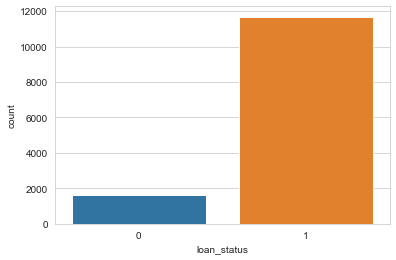

In [101]:
loan_status_division = sns.countplot(final_loan_data['loan_status'])
loan_status_division

In [102]:
final_loan_data_numeric = final_loan_data.select_dtypes(['number'])

__<h>Clustering - Model 1: K means</h>__

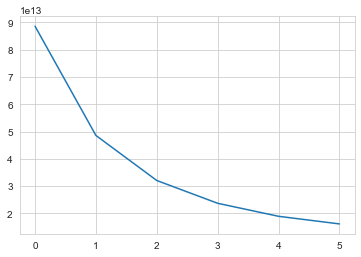

In [103]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(final_loan_data_numeric)
    ssd.append(kmeans.inertia_)
plt.pyplot.plot(ssd)

In [104]:
final_loan_data_numeric['K-Means_Cluster_ID'] = kmeans.labels_

C:\Users\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
final_loan_data_numeric.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,loan_status,...,last_fico_low_Fair,last_fico_low_Good,last_fico_low_Poor,last_fico_low_Very Good,last_fico_high_Exceptional,last_fico_high_Fair,last_fico_high_Good,last_fico_high_Poor,last_fico_high_Very Good,K-Means_Cluster_ID
3,10000.0,10000.0,10000.0,0,13.49,339.31,10,10,49200.0,1,...,1,0,0,0,0,1,0,0,0,4
6,7000.0,7000.0,7000.0,1,15.96,170.08,14,8,47004.0,1,...,1,0,0,0,0,1,0,0,0,2
7,3000.0,3000.0,3000.0,0,18.64,109.43,20,9,48000.0,1,...,0,1,0,0,0,0,1,0,0,4
9,5375.0,5375.0,5350.0,1,12.69,121.45,9,0,15000.0,0,...,0,0,1,0,0,0,0,1,0,0
12,9000.0,9000.0,9000.0,0,13.49,305.38,10,0,30000.0,0,...,1,0,0,0,0,1,0,0,0,0


In [106]:
final_loan_data_numeric['K-Means_Cluster_ID'].value_counts()

4    3484
0    2974
2    2780
5    1981
1    1221
6     608
3     267
Name: K-Means_Cluster_ID, dtype: int64

__<h>Clustering - Model 2: Hierarchical clustering</h>__

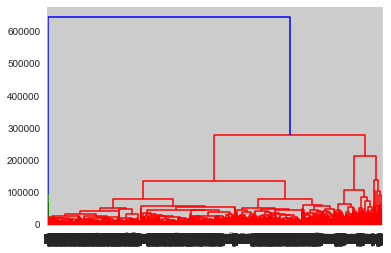

In [107]:
av_mergings = linkage(final_loan_data_numeric, method="average", metric='euclidean')
dendrogram(av_mergings)
plt.pyplot.show()

In [108]:
av_cluster_labels = cut_tree(av_mergings, n_clusters=3).reshape(-1, )

In [109]:
final_loan_data_numeric['Linkage_Cluster_ID'] = av_cluster_labels

C:\Users\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
final_loan_data_numeric['Linkage_Cluster_ID'].value_counts()

0    11456
1     1813
2       46
Name: Linkage_Cluster_ID, dtype: int64

__<h>Clustering - Model 3: DBSCAN</h>__

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_loan_data_numeric)

In [112]:
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized)

In [113]:
# I create subsidiary PCA for the purpose of DBSCAN clustering

from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

In [114]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
labels = db_default.labels_

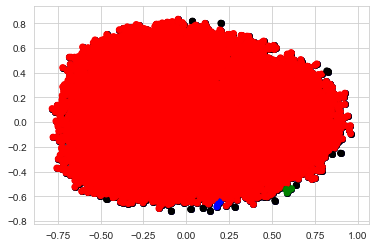

In [115]:
# I create visualization of clusters created with the DBSCAN method

colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.pyplot.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.pyplot.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.pyplot.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.pyplot.scatter(X_principal['P1'], X_principal['P2'], color ='k');

plt.pyplot.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

In [116]:
final_loan_data_numeric['DBSCAN_cluster_ID'] = db_default.labels_

C:\Users\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
final_loan_data_numeric['DBSCAN_cluster_ID'].value_counts()

 0    13294
-1       14
 1        4
 2        3
Name: DBSCAN_cluster_ID, dtype: int64

<b>Only KMeans clustering and linkage gave a visible division of the data into clusters. I check the distribution in the groups of paid and unpaid loans</b>

In [118]:
charged_off_loan = final_loan_data_numeric[final_loan_data_numeric.loan_status == 0]
fully_paid_loan = final_loan_data_numeric[final_loan_data_numeric.loan_status == 1]

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

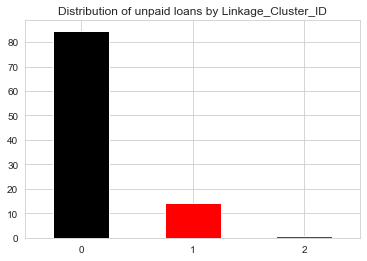

In [119]:
linkage_cluster_perc_unpaid = charged_off_loan['Linkage_Cluster_ID'].value_counts()/charged_off_loan['Linkage_Cluster_ID'].value_counts().sum()*100
linkage_cluster_perc_unpaid.plot(kind='bar', title = 'Distribution of unpaid loans by Linkage_Cluster_ID', color=['black', 'red', 'green', 'blue','orange','yellow','purple','pink'])
plt.pyplot.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

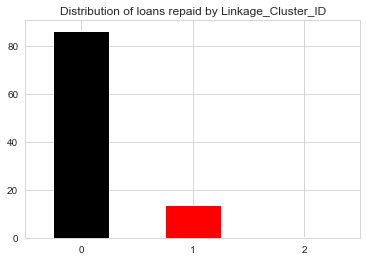

In [120]:
linkage_cluster_perc_paid = fully_paid_loan['Linkage_Cluster_ID'].value_counts()/fully_paid_loan['Linkage_Cluster_ID'].value_counts().sum()*100
linkage_cluster_perc_paid.plot(kind='bar', title = 'Distribution of loans repaid by Linkage_Cluster_ID', color=['black', 'red', 'green', 'blue','orange','yellow','purple','pink'])
plt.pyplot.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

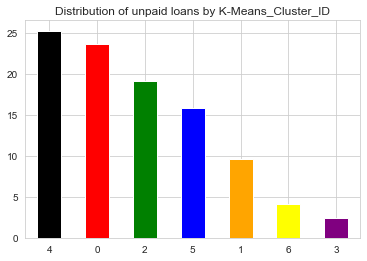

In [121]:
kmeans_cluster_perc_unpaid = charged_off_loan['K-Means_Cluster_ID'].value_counts()/charged_off_loan['K-Means_Cluster_ID'].value_counts().sum()*100
kmeans_cluster_perc_unpaid.plot(kind='bar', title = 'Distribution of unpaid loans by K-Means_Cluster_ID', color=['black', 'red', 'green', 'blue','orange','yellow','purple','pink'])
plt.pyplot.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

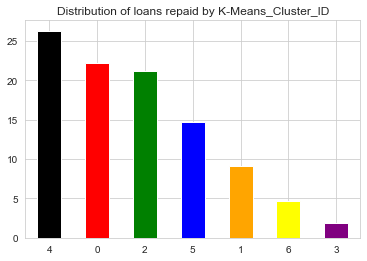

In [122]:
kmeans_cluster_perc_paid = fully_paid_loan['K-Means_Cluster_ID'].value_counts()/fully_paid_loan['K-Means_Cluster_ID'].value_counts().sum()*100
kmeans_cluster_perc_paid.plot(kind='bar', title = 'Distribution of loans repaid by K-Means_Cluster_ID', color=['black', 'red', 'green', 'blue','orange','yellow','purple','pink'])
plt.pyplot.xticks(rotation=0)

__<h>Prediction Model Training - Model 1 (KNN (K nearest neighbors)):</h>__

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [124]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [125]:
scale = StandardScaler()
scale.fit(final_loan_data_numeric.drop('loan_status',axis=1))
scaled_data = scale.transform(final_loan_data_numeric.drop('loan_status',axis=1))
df_scaled = pd.DataFrame(scaled_data,columns=final_loan_data_numeric.drop('loan_status',axis=1).columns)
df_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,...,last_fico_low_Poor,last_fico_low_Very Good,last_fico_high_Exceptional,last_fico_high_Fair,last_fico_high_Good,last_fico_high_Poor,last_fico_high_Very Good,K-Means_Cluster_ID,Linkage_Cluster_ID,DBSCAN_cluster_ID
0,-0.088185,-0.044369,0.037845,-0.568244,0.490400,0.178273,0.078976,1.541807,-0.426604,0.977268,...,-0.318599,-0.581773,0.0,1.881826,-0.832691,-0.318599,-0.620799,0.708308,-0.397557,0.006329
1,-0.580470,-0.559109,-0.479887,1.759808,1.217086,-0.781628,0.724901,0.964748,-0.496147,1.510519,...,-0.318599,-0.581773,0.0,1.881826,-0.832691,-0.318599,-0.620799,-0.328706,-0.397557,0.006329
2,-1.236850,-1.245430,-1.170196,-0.568244,2.005555,-1.125645,1.693788,1.253278,-0.464605,-1.248409,...,-0.318599,-0.581773,0.0,-0.531399,1.200926,-0.318599,-0.620799,0.708308,-0.397557,0.006329
3,-0.847124,-0.837927,-0.764639,1.759808,0.255036,-1.057465,-0.082505,-1.343488,-1.509654,0.685575,...,3.138737,-0.581773,0.0,-0.531399,-0.832691,3.138737,-0.620799,-1.365720,-0.397557,0.006329
4,-0.252280,-0.215949,-0.134732,-0.568244,0.490400,-0.014183,0.078976,-1.343488,-1.034632,-0.529812,...,-0.318599,-0.581773,0.0,1.881826,-0.832691,-0.318599,-0.620799,-1.365720,-0.397557,0.006329


In [126]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scaled_data,final_loan_data_numeric['loan_status'],
                                                    test_size=0.30, stratify=final_loan_data_numeric['loan_status'])

In [127]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [128]:
knn.fit(X_scaled_train,y_scaled_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [129]:
knn_prediction = knn.predict(X_scaled_test)

In [130]:
print(classification_report(knn_prediction,y_scaled_test))
knn1_pr = evaluate(knn_prediction,y_scaled_test)
knn1_pr

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       580
           1       0.94      0.96      0.95      3415

    accuracy                           0.92      3995
   macro avg       0.85      0.80      0.82      3995
weighted avg       0.91      0.92      0.91      3995



{'f1-score': 0.95, 'accuracy': 0.92}

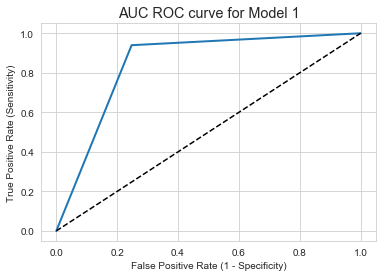

In [131]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_scaled_test, knn_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 1')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [132]:
from sklearn.metrics import roc_auc_score
ROC_AUC_KNN = roc_auc_score(y_scaled_test, knn_prediction)
print('ROC AUC for the KNN model : {:.4f}'.format(ROC_AUC_KNN))

ROC AUC for the KNN model : 0.8460


__<h>Prediction Model Training - Model 2 (Decision Tree):</h>__

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
X_train, X_test, y_train, y_test = train_test_split(final_loan_data_numeric.drop('loan_status',axis=1), final_loan_data_numeric['loan_status'], test_size=0.30, random_state=42, stratify=final_loan_data_numeric['loan_status'])

In [135]:
dtree = DecisionTreeClassifier()

In [136]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [137]:
dt_prediction = dtree.predict(X_test)

In [138]:
print(classification_report(y_test,dt_prediction))

dtree_pr= evaluate(dt_prediction,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       489
           1       1.00      1.00      1.00      3506

    accuracy                           1.00      3995
   macro avg       1.00      0.99      1.00      3995
weighted avg       1.00      1.00      1.00      3995



{'f1-score': 1.0, 'accuracy': 1.0}

[Text(226.87105263157895, 206.56799999999998, 'X[24] <= 0.005\ngini = 0.215\nsamples = 9320\nvalue = [1140, 8180]'),
 Text(209.25, 184.824, 'X[21] <= 449.595\ngini = 0.002\nsamples = 8188\nvalue = [8, 8180]'),
 Text(191.62894736842105, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(226.87105263157895, 163.07999999999998, 'X[43] <= 2799.5\ngini = 0.002\nsamples = 8187\nvalue = [7, 8180]'),
 Text(154.18421052631578, 141.336, 'X[26] <= 57.495\ngini = 0.001\nsamples = 8104\nvalue = [5, 8099]'),
 Text(96.91578947368421, 119.592, 'X[26] <= 57.375\ngini = 0.019\nsamples = 425\nvalue = [4, 421]'),
 Text(79.29473684210527, 97.848, 'X[27] <= 511.5\ngini = 0.014\nsamples = 424\nvalue = [3, 421]'),
 Text(35.242105263157896, 76.10399999999998, 'X[26] <= 42.925\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(17.621052631578948, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(52.863157894736844, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1

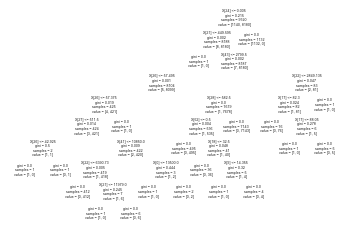

In [139]:
from sklearn import tree
tree.plot_tree(dtree)

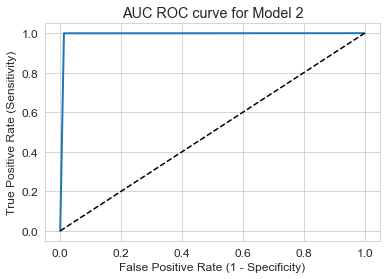

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, dt_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 2')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [141]:
ROC_AUC_DT = roc_auc_score(y_test, dt_prediction)
print('ROC AUC for Decision Tree Model : {:.4f}'.format(ROC_AUC_DT))

ROC AUC for Decision Tree Model : 0.9936


__<h>Prediction Model Training - Model 3 (Random Forest):</h>__

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100,min_samples_split= 5, min_samples_leaf = 1,max_leaf_nodes= 2,max_features= 'auto',max_depth= 70)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=2, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
rf_prediction = rf.predict(X_test)

In [144]:
print(classification_report(y_test,rf_prediction))
rf_pr = evaluate(rf_prediction,y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       489
           1       0.88      1.00      0.93      3506

    accuracy                           0.88      3995
   macro avg       0.44      0.50      0.47      3995
weighted avg       0.77      0.88      0.82      3995

{'f1-score': 0.93, 'accuracy': 0.88}


C:\Users\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


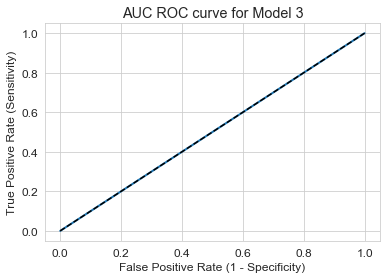

In [145]:
fpr, tpr, thresholds = roc_curve(y_test, rf_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 3')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [146]:
ROC_AUC_RF = roc_auc_score(y_test, rf_prediction)
print('ROC AUC for the Random Forrest model : {:.4f}'.format(ROC_AUC_RF))

ROC AUC for the Random Forrest model : 0.5000


__<h>Prediction model training - Model 4 (CNN - Convolutional Neural Network):</h>__

In [147]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' 

In [148]:
X_train, X_test, y_train, y_test = train_test_split(final_loan_data_numeric.drop('loan_status',axis=1), final_loan_data_numeric['loan_status'], test_size=0.30, random_state=0, stratify=final_loan_data_numeric['loan_status'])

In [149]:
model_4_cnn = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [150]:
model_4_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_4_cnn.fit(X_train, y_train, epochs=16, batch_size=32)
test_loss, test_acc = model_4_cnn.evaluate(X_test, y_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/16
9320/9320 [==============================] - 0s 44us/sample - loss: 164.1167 - acc: 0.8369
Epoch 2/16
9320/9320 [==============================] - 0s 32us/sample - loss: 21.2280 - acc: 0.9332
Epoch 3/16
9320/9320 [==============================] - 0s 32us/sample - loss: 12.8677 - acc: 0.9498
Epoch 4/16
9320/9320 [==============================] - 0s 32us/sample - loss: 15.9780 - acc: 0.9548
Epoch 5/16
9320/9320 [==============================] - 0s 33us/sample - loss: 4.9993 - acc: 0.9761
Epoch 6/16
9320/9320 [==============================] - 0s 32us/sample - loss: 7.7078 - acc: 0.9681
Epoch 7/16
9320/9320 [==============================] - 0s 33us/sample - loss: 4.3876 - acc: 0.9783
Epoch 8/16
9320/9320 [==============================] - 0s 32us/sample - loss: 8.9507 - acc: 0.9678
Epoch 9/16
9320/9320 [==============================] - 0s 31us/sample - loss: 4.0049 - acc: 0.9829
E

In [151]:
test_loss, test_acc = model_4_cnn.evaluate(X_test, y_test)
print(test_acc)

3995/3995 [==============================] - 0s 18us/sample - loss: 0.4344 - acc: 0.9957
0.9957447


In [152]:
cnn_prediction = model_4_cnn.predict(X_test)

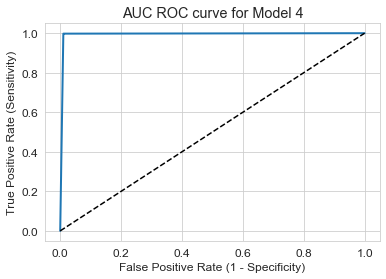

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, cnn_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 4')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [154]:
ROC_AUC_CNN = roc_auc_score(y_test, cnn_prediction)
print('ROC AUC for the CNN model (neural network) : {:.4f}'.format(ROC_AUC_CNN))

ROC AUC for the CNN model (neural network) : 0.9937


__<h>Prediction Model Training - Model 5 (Catboost):</h>__

In [155]:
from catboost import CatBoostClassifier
model_5_catboost = CatBoostClassifier()
categorical_features_indices = np.where(final_loan_data_numeric.dtypes != np.float)[0]
model_5_catboost.set_params(iterations = 3, use_best_model = True, depth = 3)
model_5_catboost.fit(X_train,y_train, eval_set=(X_test, y_test))
model_5_catboost.score(X_test,y_test)

Learning rate set to 0.5
0:	learn: 0.0569167	test: 0.0528691	best: 0.0528691 (0)	total: 152ms	remaining: 304ms
1:	learn: 0.0136260	test: 0.0106264	best: 0.0106264 (1)	total: 157ms	remaining: 78.7ms
2:	learn: 0.0109341	test: 0.0084434	best: 0.0084434 (2)	total: 161ms	remaining: 0us

bestTest = 0.008443439949
bestIteration = 2



0.9994993742177722

In [156]:
catboost_prediction = model_5_catboost.predict(X_test)

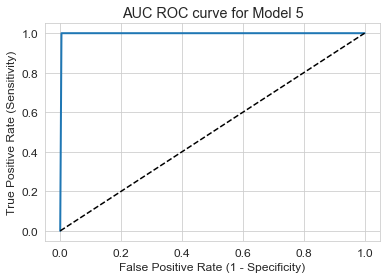

In [157]:
fpr, tpr, thresholds = roc_curve(y_test, catboost_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 5')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [158]:
ROC_AUC_CATBST = roc_auc_score(y_test, catboost_prediction)
print('ROC AUC for Catboost : {:.4f}'.format(ROC_AUC_CATBST))

ROC AUC for Catboost : 0.9980


__<h>Comparison of models based on the AUROC score</h>__

In [159]:
print('AUC ROC score overview for all models')
print('\n')
print('Model 1 (KNN):\t\t\t {:.4f}'.format(ROC_AUC_KNN))
print('Model 2 (Decision Tree):\t {:.4f}'.format(ROC_AUC_DT))
print('Model 3 (Random Forrest):\t {:.4f}'.format(ROC_AUC_RF))
print('Model 4 (CNN):\t\t\t {:.4f}'.format(ROC_AUC_CNN))
print('Model 5 (Catboost):\t\t {:.4f}'.format(ROC_AUC_CATBST))

AUC ROC score overview for all models


Model 1 (KNN):			 0.8460
Model 2 (Decision Tree):	 0.9936
Model 3 (Random Forrest):	 0.5000
Model 4 (CNN):			 0.9937
Model 5 (Catboost):		 0.9980


__<h>Comparison of models' effectiveness on compressed data using PCA, and finally a summary of the AUROC score</h>__

__<h>PCA</h>__

In [160]:
X = final_loan_data_numeric.drop('loan_status',axis=1)
y = final_loan_data_numeric['loan_status']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=final_loan_data_numeric['loan_status'])

In [162]:
sc = StandardScaler() 
  
PCA_X_train = sc.fit_transform(X_train) 
PCA_X_test = sc.transform(X_test)

In [163]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 7) 
  
PCA_X_train = pca.fit_transform(X_train) 
PCA_X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_

__<h>PCA - Model 1 (KNN (K nearest neighbours)):</h>__

In [164]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(PCA_X_train,y_scaled_train)

PCA_knn_prediction = knn.predict(PCA_X_test)

In [165]:
print(classification_report(PCA_knn_prediction,y_scaled_test))
knn1_pr = evaluate(PCA_knn_prediction,y_scaled_test)
knn1_pr

              precision    recall  f1-score   support

           0       0.21      0.11      0.14       940
           1       0.76      0.87      0.81      3055

    accuracy                           0.69      3995
   macro avg       0.49      0.49      0.48      3995
weighted avg       0.63      0.69      0.66      3995



{'f1-score': 0.81, 'accuracy': 0.69}

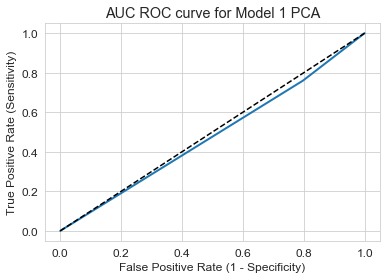

In [166]:
fpr, tpr, thresholds = roc_curve(y_test, PCA_knn_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 1 PCA')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [167]:
PCA_ROC_AUC_KNN = roc_auc_score(y_test, PCA_knn_prediction)
print('ROC AUC for PCA_KNN model : {:.4f}'.format(PCA_ROC_AUC_KNN))

ROC AUC for PCA_KNN model : 0.4813


__<h>PCA - Model 2 (Decision tree):</h>__

In [168]:
dtree.fit(PCA_X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [169]:
PCA_dt_prediction = dtree.predict(PCA_X_test)

In [170]:
print(classification_report(y_test,PCA_dt_prediction))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       489
           1       0.98      0.98      0.98      3506

    accuracy                           0.97      3995
   macro avg       0.94      0.94      0.94      3995
weighted avg       0.97      0.97      0.97      3995



In [171]:
dtree_pr = evaluate(PCA_dt_prediction,y_test)
dtree_pr

{'f1-score': 0.98, 'accuracy': 0.97}

[Text(242.7618447580645, 210.645, 'X[4] <= 2580.575\ngini = 0.215\nsamples = 9320\nvalue = [1140, 8180]'),
 Text(179.03014112903224, 197.055, 'X[4] <= 957.281\ngini = 0.075\nsamples = 8394\nvalue = [329, 8065]'),
 Text(130.99899193548387, 183.465, 'X[4] <= 125.282\ngini = 0.049\nsamples = 7852\nvalue = [196, 7656]'),
 Text(88.02217741935483, 169.875, 'X[2] <= -11571.973\ngini = 0.033\nsamples = 7035\nvalue = [117, 6918]'),
 Text(56.025, 156.285, 'X[4] <= -410.111\ngini = 0.091\nsamples = 1529\nvalue = [73, 1456]'),
 Text(39.58548387096774, 142.695, 'X[4] <= -759.131\ngini = 0.063\nsamples = 1472\nvalue = [48, 1424]'),
 Text(19.248387096774195, 129.10500000000002, 'X[5] <= -6050.438\ngini = 0.038\nsamples = 1340\nvalue = [26, 1314]'),
 Text(17.85483870967742, 115.515, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(20.641935483870967, 115.515, 'X[3] <= -188.746\ngini = 0.037\nsamples = 1339\nvalue = [25, 1314]'),
 Text(6.967741935483871, 101.925, 'X[0] <= -158515.664\ngini = 0.01\nsam

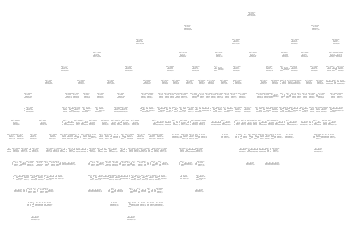

In [172]:
tree.plot_tree(dtree)

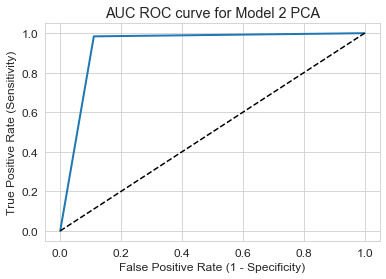

In [173]:
fpr, tpr, thresholds = roc_curve(y_test, PCA_dt_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 2 PCA')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [174]:
PCA_ROC_AUC_DT = roc_auc_score(y_test, PCA_dt_prediction)
print('ROC AUC for Decision Tree PCA model : {:.4f}'.format(PCA_ROC_AUC_DT))

ROC AUC for Decision Tree PCA model : 0.9368


__<h>PCA - Model 3 (Random forrest):</h>__

In [175]:
rf.fit(PCA_X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=2, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
PCA_rf_prediction = rf.predict(PCA_X_test)

In [177]:
print(classification_report(y_test,PCA_rf_prediction))
PCA_rf_pr = evaluate(PCA_rf_prediction,y_test)
print(PCA_rf_pr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       489
           1       0.88      1.00      0.93      3506

    accuracy                           0.88      3995
   macro avg       0.44      0.50      0.47      3995
weighted avg       0.77      0.88      0.82      3995

{'f1-score': 0.93, 'accuracy': 0.88}


C:\Users\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


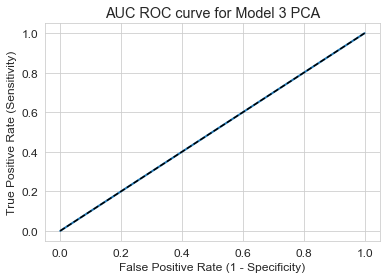

In [178]:
fpr, tpr, thresholds = roc_curve(y_test, PCA_rf_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 3 PCA')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [179]:
PCA_ROC_AUC_RF = roc_auc_score(y_test, PCA_rf_prediction)
print('ROC AUC for Random Forrest PCA model : {:.4f}'.format(PCA_ROC_AUC_RF))

ROC AUC for Random Forrest PCA model : 0.5000


__<h>PCA - Model 4 (CNN - Convolutional Neural Network):</h>__

In [180]:
PCA_model_4_cnn = keras.Sequential([
    keras.layers.Flatten(input_shape=(7,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [181]:
PCA_model_4_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [182]:
PCA_model_4_cnn.fit(PCA_X_train, y_train, epochs=16, batch_size=32)
test_loss, test_acc = PCA_model_4_cnn.evaluate(PCA_X_test, y_test)

Epoch 1/16
9320/9320 [==============================] - 0s 41us/sample - loss: 944.7766 - acc: 0.7582
Epoch 2/16
9320/9320 [==============================] - 0s 29us/sample - loss: 31.4144 - acc: 0.9093
Epoch 3/16
9320/9320 [==============================] - 0s 29us/sample - loss: 22.5118 - acc: 0.9330
Epoch 4/16
9320/9320 [==============================] - 0s 33us/sample - loss: 21.5490 - acc: 0.9400
Epoch 5/16
9320/9320 [==============================] - 0s 32us/sample - loss: 14.6474 - acc: 0.9505
Epoch 6/16
9320/9320 [==============================] - 0s 30us/sample - loss: 19.4838 - acc: 0.9457
Epoch 7/16
9320/9320 [==============================] - 0s 32us/sample - loss: 16.7513 - acc: 0.9543
Epoch 8/16
9320/9320 [==============================] - 0s 32us/sample - loss: 21.3316 - acc: 0.9506
Epoch 9/16
9320/9320 [==============================] - 0s 32us/sample - loss: 18.1277 - acc: 0.9592
Epoch 10/16
9320/9320 [==============================] - 0s 28us/sample - loss: 16.0164 - 

In [183]:
test_loss, test_acc = PCA_model_4_cnn.evaluate(PCA_X_test, y_test)
print(test_acc)

3995/3995 [==============================] - 0s 24us/sample - loss: 8.8037 - acc: 0.9745
0.9744681


In [184]:
PCA_cnn_prediction = PCA_model_4_cnn.predict(PCA_X_test)

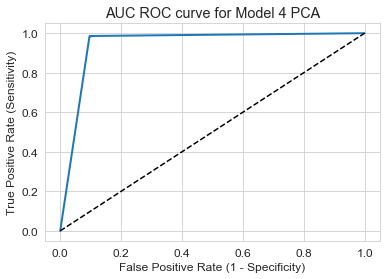

In [185]:
fpr, tpr, thresholds = roc_curve(y_test, PCA_cnn_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 4 PCA')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [186]:
PCA_ROC_AUC_CNN = roc_auc_score(y_test, PCA_cnn_prediction)
print('ROC AUC for CNN (neural network) PCA model : {:.4f}'.format(PCA_ROC_AUC_CNN))

ROC AUC for CNN (neural network) PCA model : 0.9447


__<h>PCA - Model 5 (Catboost):</h>__

In [187]:
PCA_model_5_catboost = CatBoostClassifier()
categorical_features_indices = np.where(final_loan_data_numeric.dtypes != np.float)[0]
PCA_model_5_catboost.set_params(iterations = 3, use_best_model = True, depth = 3)
PCA_model_5_catboost.fit(PCA_X_train,y_train, eval_set=(PCA_X_test, y_test))
PCA_model_5_catboost.score(PCA_X_test,y_test)

Learning rate set to 0.5
0:	learn: 0.3810598	test: 0.3807484	best: 0.3807484 (0)	total: 2.31ms	remaining: 4.62ms
1:	learn: 0.2549948	test: 0.2511913	best: 0.2511913 (1)	total: 4.17ms	remaining: 2.08ms
2:	learn: 0.1945388	test: 0.1882332	best: 0.1882332 (2)	total: 6.13ms	remaining: 0us

bestTest = 0.1882332078
bestIteration = 2



0.9609511889862328

In [188]:
PCA_catboost_prediction = PCA_model_5_catboost.predict(X_test)

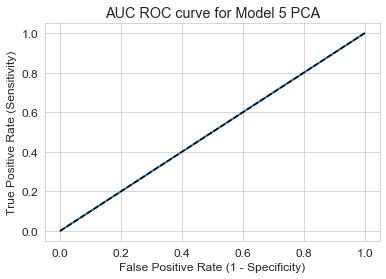

In [189]:
fpr, tpr, thresholds = roc_curve(y_test, PCA_catboost_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC curve for Model 5 PCA')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [190]:
PCA_ROC_AUC_CATBST = roc_auc_score(y_test, PCA_catboost_prediction)
print('ROC AUC for Catboost PCA model : {:.4f}'.format(PCA_ROC_AUC_CATBST))

ROC AUC for Catboost PCA model : 0.5000


In [191]:
print('Summary for AUC ROC score in all models')
print('\n')
print('\t\t\t', 'Full list of variables', '\t\t  PCA')

print('Model 1 (KNN):\t\t\t {:.4f}'.format(ROC_AUC_KNN), '\t\t {:.4f}'.format(PCA_ROC_AUC_KNN))
print('Model 2 (Decision Tree):\t {:.4f}'.format(ROC_AUC_DT), '\t\t {:.4f}'.format(PCA_ROC_AUC_DT))
print('Model 3 (Random Forrest):\t {:.4f}'.format(ROC_AUC_RF), '\t\t {:.4f}'.format(PCA_ROC_AUC_RF))
print('Model 4 (CNN):\t\t\t {:.4f}'.format(ROC_AUC_CNN), '\t\t {:.4f}'.format(PCA_ROC_AUC_CNN))
print('Model 5 (Catboost):\t\t {:.4f}'.format(ROC_AUC_CATBST), '\t\t {:.4f}'.format(PCA_ROC_AUC_CATBST))

Summary for AUC ROC score in all models


			 Full list of variables 		  PCA
Model 1 (KNN):			 0.8460 		 0.4813
Model 2 (Decision Tree):	 0.9936 		 0.9368
Model 3 (Random Forrest):	 0.5000 		 0.5000
Model 4 (CNN):			 0.9937 		 0.9447
Model 5 (Catboost):		 0.9980 		 0.5000


<b>In the case of the AUC ROC measure, the closer the result is to 0.5, the closer the model is to the random selection, and the closer it is to 1, the more efficient the model is in predicting values: it has the least errors of the first type (false positives) and the second type (false negatives). Therefore, I have decided to choose a decision tree based on the full list of variables as my final model.</b>

<b>Final model</b>

In [192]:
X_train, X_test, y_train, y_test = train_test_split(final_loan_data_numeric.drop('loan_status',axis=1), final_loan_data_numeric['loan_status'], test_size=0.30, random_state=42, stratify=final_loan_data_numeric['loan_status'])

In [193]:
# I decided to leave all tree parameters with the default values, except for:

dtree_final = DecisionTreeClassifier(class_weight='balanced')

In [194]:
dtree_final.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

I check the accuracy of the model prediction one more time

In [195]:
dt_final_prediction = dtree_final.predict(X_test)

print(classification_report(y_test,dt_final_prediction))
dtree_final_pr= evaluate(dt_final_prediction,y_test)
dtree_final_pr

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       489
           1       1.00      1.00      1.00      3506

    accuracy                           1.00      3995
   macro avg       1.00      0.99      1.00      3995
weighted avg       1.00      1.00      1.00      3995



{'f1-score': 1.0, 'accuracy': 1.0}

In [196]:
confusion_matrix(y_test, dt_final_prediction)

array([[ 483,    6],
       [   2, 3504]], dtype=int64)

[Text(200.88, 205.35999999999999, 'X[24] <= 0.005\ngini = 0.5\nsamples = 9320\nvalue = [4660.0, 4660.0]'),
 Text(178.56, 181.2, 'X[21] <= 449.595\ngini = 0.014\nsamples = 8188\nvalue = [32.702, 4660.0]'),
 Text(156.24, 157.04, 'gini = 0.0\nsamples = 1\nvalue = [4.088, 0.0]'),
 Text(200.88, 157.04, 'X[43] <= 2799.5\ngini = 0.012\nsamples = 8187\nvalue = [28.614, 4660.0]'),
 Text(111.6, 132.88, 'X[26] <= 57.495\ngini = 0.009\nsamples = 8104\nvalue = [20.439, 4613.856]'),
 Text(44.64, 108.72, 'X[39] <= 48.0\ngini = 0.12\nsamples = 425\nvalue = [16.351, 239.836]'),
 Text(22.32, 84.56, 'gini = -0.0\nsamples = 370\nvalue = [0.0, 210.782]'),
 Text(66.96000000000001, 84.56, 'X[43] <= 1370.5\ngini = 0.461\nsamples = 55\nvalue = [16.351, 29.054]'),
 Text(44.64, 60.400000000000006, 'gini = -0.0\nsamples = 41\nvalue = [0.0, 23.357]'),
 Text(89.28, 60.400000000000006, 'X[21] <= 10829.0\ngini = 0.383\nsamples = 14\nvalue = [16.351, 5.697]'),
 Text(66.96000000000001, 36.24000000000001, 'X[27] <= 674.

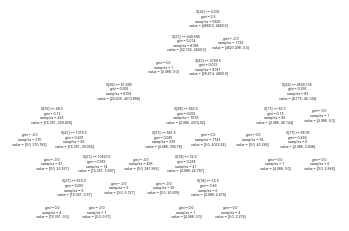

In [197]:
# Decision tree visualization

tree.plot_tree(dtree_final)

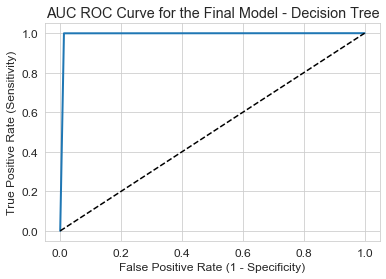

In [198]:
fpr, tpr, thresholds = roc_curve(y_test, dt_final_prediction)
plt.pyplot.figure(figsize=(6,4))
plt.pyplot.plot(fpr, tpr, linewidth=2)
plt.pyplot.plot([0,1], [0,1], 'k--' )
plt.pyplot.rcParams['font.size'] = 12
plt.pyplot.title('AUC ROC Curve for the Final Model - Decision Tree')
plt.pyplot.xlabel('False Positive Rate (1 - Specificity)')
plt.pyplot.ylabel('True Positive Rate (Sensitivity)')
plt.pyplot.show()

In [199]:
ROC_AUC_DT = roc_auc_score(y_test, dt_final_prediction)
print('ROC AUC for the Final Model Model - Decision Tree : {:.4f}'.format(ROC_AUC_DT))

ROC AUC for the Final Model Model - Decision Tree : 0.9936


<b>Important variables</b>

In [200]:
# I check the weights for individual variables in the model:

importance = dtree_final.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00161
Feature: 18, Score: 0.00149
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00331
Feature: 22, Score: 0.00137
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.98606
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00041
Feature: 27, Score: 0.00048
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

In [201]:
# I create a list of features with the highest weight for the final model

feature_index = list(np.where(importance > 0.00001))
feature_index_list = list(feature_index[0])
important_col_names = final_loan_data_numeric.columns[feature_index_list]
important_col_importance = list(importance[feature_index_list].round(5))
important_features = dict(zip(important_col_names,important_col_importance))
important_features

for i in range(len(important_features)):
    print('Feature', list(important_features.keys())[i].upper(), '\nWeight: ', list(important_features.values())[i],'\n')

Feature REVOL_BAL 
Weight:  0.00161 

Feature REVOL_UTIL 
Weight:  0.00149 

Feature TOTAL_PYMNT_INV 
Weight:  0.00331 

Feature TOTAL_REC_PRNCP 
Weight:  0.00137 

Feature TOTAL_REC_LATE_FEE 
Weight:  0.98606 

Feature COLLECTION_RECOVERY_FEE 
Weight:  0.00041 

Feature LAST_PYMNT_AMNT 
Weight:  0.00048 

Feature LAST_FICO_RANGE_HIGH 
Weight:  2e-05 

Feature NORTHSOUTH 
Weight:  0.00208 

Feature TIME_TILL_LAST_PYMNT 
Weight:  0.00317 



# Commentary
Here, I pulled out a list of the most important factors and trained a new decision tree that only considered total_rec_late_fee and a few of the most important variables (e.g. those with a weight above 0.001). However, despite such large disproportions in weights and the apparently low importance of the remaining variables, with each reduction in the number of variables, the AUC of the ROC of the model was systematically dropping. After numerous tests, while the effect persisted, I decided to stick to the model that takes into account all 60 variables.

# <b>Cross-validation</b>

I have decided to use K-fold validation on 3 independent test sets:

In [202]:
final_loan_data_numeric.shape

(13315, 65)

In [203]:
14327/3

4775.666666666667

In [204]:
crosstest_data_1 = final_loan_data_numeric[0:4699]
crosstest_data_2 = final_loan_data_numeric[4700:9400]
crosstest_data_3 = final_loan_data_numeric[9401:14100]

In [205]:
X_test_1, y_test_1 = crosstest_data_1.drop('loan_status',axis=1), crosstest_data_1['loan_status']
X_test_2, y_test_2 = crosstest_data_2.drop('loan_status',axis=1), crosstest_data_2['loan_status']
X_test_3, y_test_3 = crosstest_data_3.drop('loan_status',axis=1), crosstest_data_3['loan_status']

In [206]:
dt_crosstest_prediction_1 = dtree_final.predict(X_test_1)
dt_crosstest_prediction_2 = dtree_final.predict(X_test_2)
dt_crosstest_prediction_3 = dtree_final.predict(X_test_3)

In [207]:
ROC_AUC_Crosstest_1 = roc_auc_score(y_test_1, dt_crosstest_prediction_1)
ROC_AUC_Crosstest_2 = roc_auc_score(y_test_2, dt_crosstest_prediction_2)
ROC_AUC_Crosstest_3 = roc_auc_score(y_test_3, dt_crosstest_prediction_3)

In [208]:
print('TEST 1: ROC AUC for model cross-validation: /t', ROC_AUC_Crosstest_1)
print('TEST 2: ROC AUC for model cross-validation: /t', ROC_AUC_Crosstest_2)
print('TEST 3: ROC AUC for model cross-validation: /t', ROC_AUC_Crosstest_3)

TEST 1: ROC AUC for model cross-validation: /t 0.9978038067349927
TEST 2: ROC AUC for model cross-validation: /t 0.9989589106395345
TEST 3: ROC AUC for model cross-validation: /t 0.997376200851913
